In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
print num_batches

666


In [4]:
def generateData():
    np.random.seed(0)
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)

    x = x.reshape((batch_size, -1))  # The first index changing slowest, subseries as rows
    y = y.reshape((batch_size, -1))

    return (x, y)

In [5]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size , state_size])


In [6]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1,state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes),dtype=tf.float32)
b2 = tf.Variable(np.zeros((1,num_classes)), dtype=tf.float32)


In [7]:
# Unpack columns
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)


In [9]:
for i in inputs_series:
    print i

Tensor("unstack:0", shape=(5,), dtype=float32)
Tensor("unstack:1", shape=(5,), dtype=float32)
Tensor("unstack:2", shape=(5,), dtype=float32)
Tensor("unstack:3", shape=(5,), dtype=float32)
Tensor("unstack:4", shape=(5,), dtype=float32)
Tensor("unstack:5", shape=(5,), dtype=float32)
Tensor("unstack:6", shape=(5,), dtype=float32)
Tensor("unstack:7", shape=(5,), dtype=float32)
Tensor("unstack:8", shape=(5,), dtype=float32)
Tensor("unstack:9", shape=(5,), dtype=float32)
Tensor("unstack:10", shape=(5,), dtype=float32)
Tensor("unstack:11", shape=(5,), dtype=float32)
Tensor("unstack:12", shape=(5,), dtype=float32)
Tensor("unstack:13", shape=(5,), dtype=float32)
Tensor("unstack:14", shape=(5,), dtype=float32)


In [10]:
current_state = init_state
states_series = []
for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat( [current_input, current_state],1)  # Increasing number of columns

    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)  # Broadcasted addition
    states_series.append(next_state)
    current_state = next_state

In [11]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] #Broadcasted addition
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels = labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [12]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)


Instructions for updating:
Use `tf.global_variables_initializer` instead.


<Figure size 432x288 with 0 Axes>

('New data, epoch', 0)
('Step', 0, 'Loss', 0.69177175)


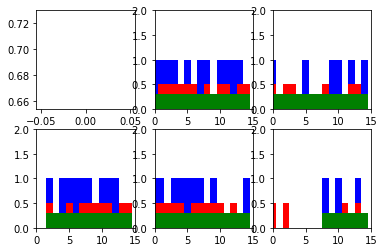

('Step', 100, 'Loss', 0.3217773)


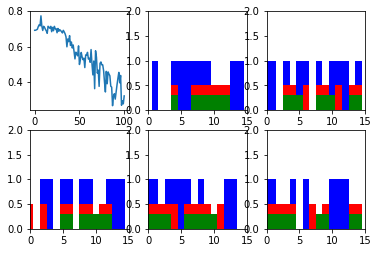

('Step', 200, 'Loss', 0.008299289)


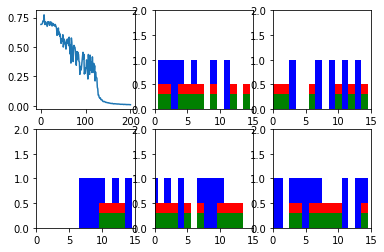

('Step', 300, 'Loss', 0.0039695594)


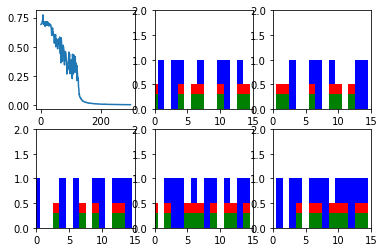

('Step', 400, 'Loss', 0.0024179528)


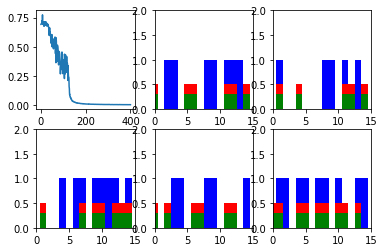

('Step', 500, 'Loss', 0.0018709381)


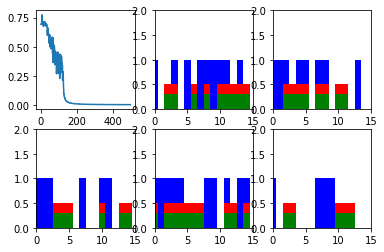

('Step', 600, 'Loss', 0.0014669221)


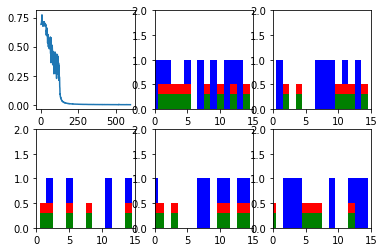

('New data, epoch', 1)
('Step', 0, 'Loss', 0.21844663)


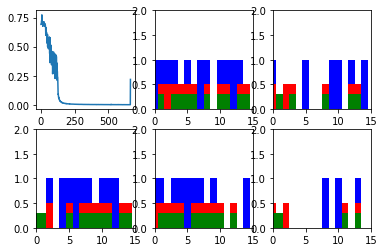

('Step', 100, 'Loss', 0.0024827137)


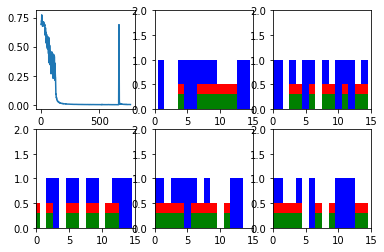

('Step', 200, 'Loss', 0.0015715496)


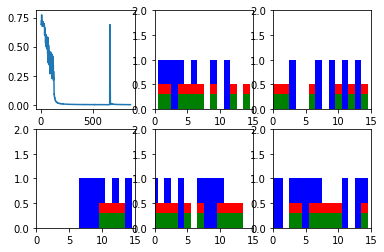

('Step', 300, 'Loss', 0.0011045621)


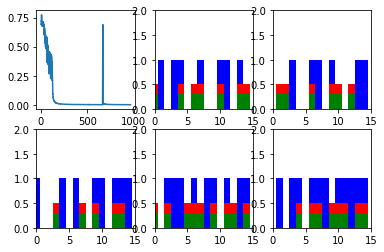

('Step', 400, 'Loss', 0.0009440361)


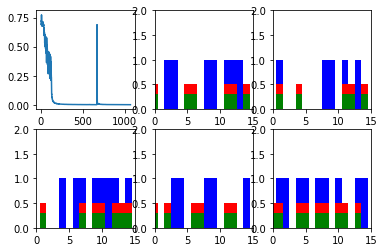

('Step', 500, 'Loss', 0.00082760415)


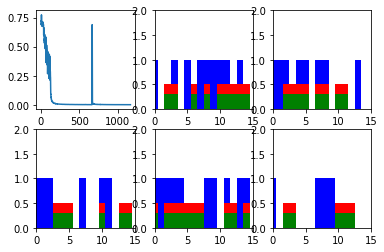

('Step', 600, 'Loss', 0.0007167315)


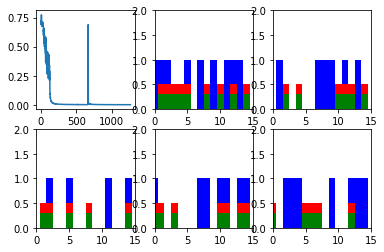

('New data, epoch', 2)
('Step', 0, 'Loss', 0.18077062)


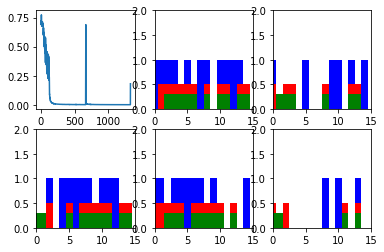

('Step', 100, 'Loss', 0.0006126163)


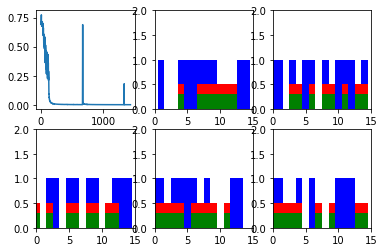

('Step', 200, 'Loss', 0.00053074746)


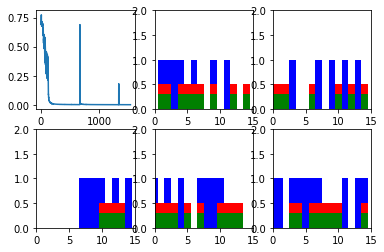

('Step', 300, 'Loss', 0.00048452237)


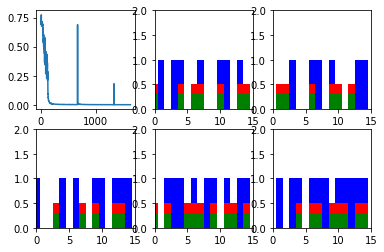

('Step', 400, 'Loss', 0.00048764775)


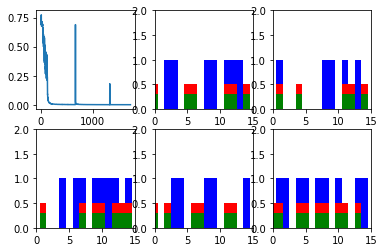

('Step', 500, 'Loss', 0.00044727672)


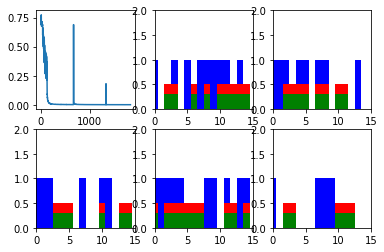

('Step', 600, 'Loss', 0.0004168795)


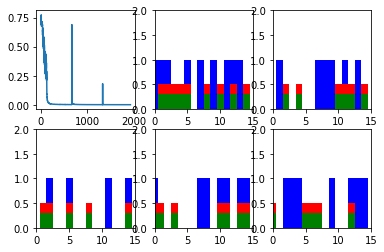

('New data, epoch', 3)
('Step', 0, 'Loss', 0.14956921)


('Step', 100, 'Loss', 0.0003914481)


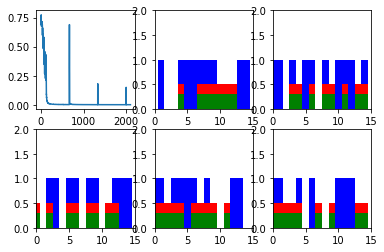

('Step', 200, 'Loss', 0.0003410392)


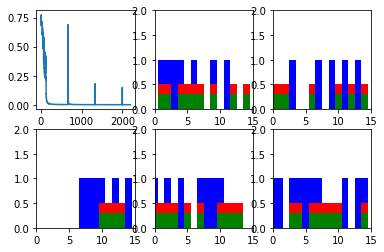

('Step', 300, 'Loss', 0.00031730984)


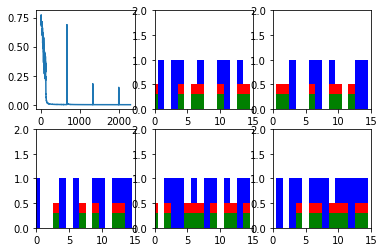

('Step', 400, 'Loss', 0.00033989438)


('Step', 500, 'Loss', 0.00030997014)


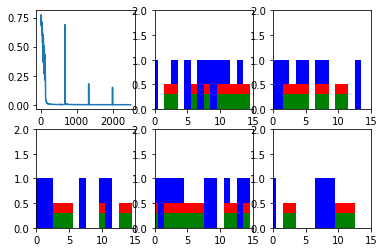

('Step', 600, 'Loss', 0.00029459616)


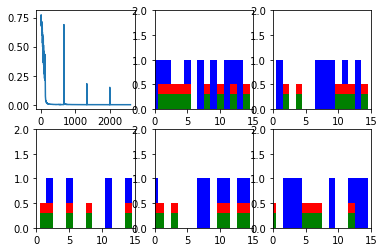

('New data, epoch', 4)
('Step', 0, 'Loss', 0.12916273)


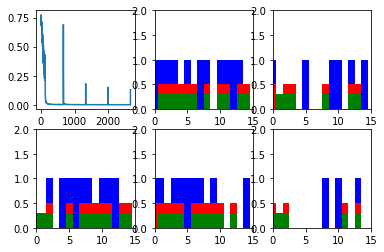

('Step', 100, 'Loss', 0.00028672526)


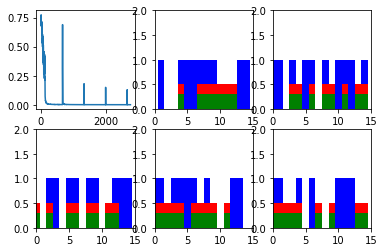

('Step', 200, 'Loss', 0.00025139467)


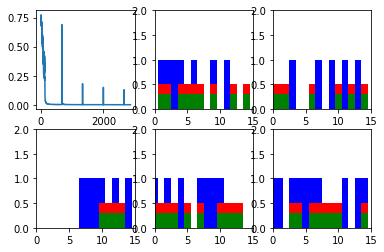

('Step', 300, 'Loss', 0.00023560894)


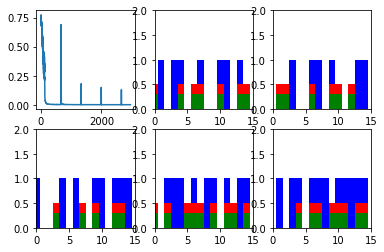

('Step', 400, 'Loss', 0.0002619276)


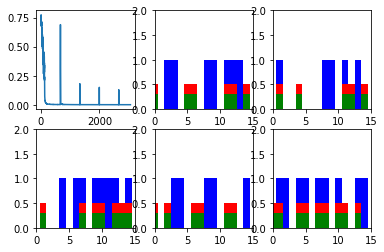

('Step', 500, 'Loss', 0.0002370992)


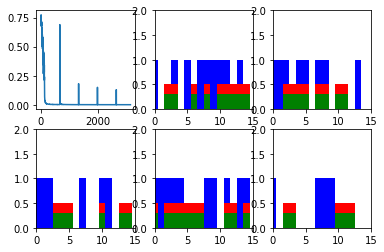

('Step', 600, 'Loss', 0.0002264579)


('New data, epoch', 5)
('Step', 0, 'Loss', 0.116659)


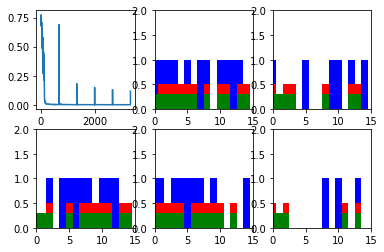

('Step', 100, 'Loss', 0.00022701065)


('Step', 200, 'Loss', 0.00019982657)


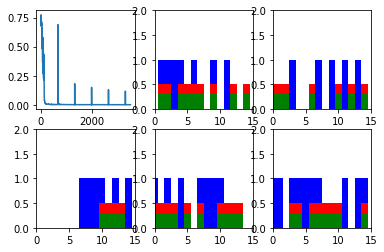

('Step', 300, 'Loss', 0.00018733744)


('Step', 400, 'Loss', 0.00021317152)


('Step', 500, 'Loss', 0.00019231714)


('Step', 600, 'Loss', 0.00018308054)


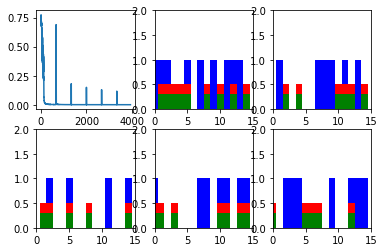

('New data, epoch', 6)
('Step', 0, 'Loss', 0.106728226)


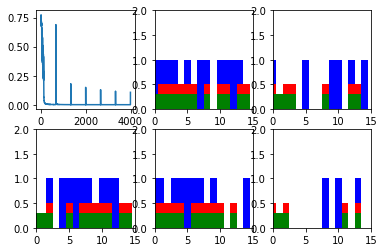

('Step', 100, 'Loss', 0.00018839008)


('Step', 200, 'Loss', 0.0001665202)


('Step', 300, 'Loss', 0.00015574526)


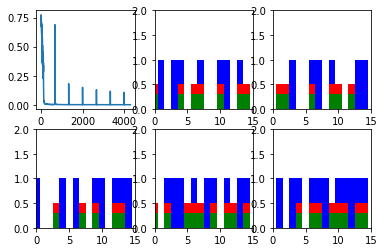

('Step', 400, 'Loss', 0.00017961029)


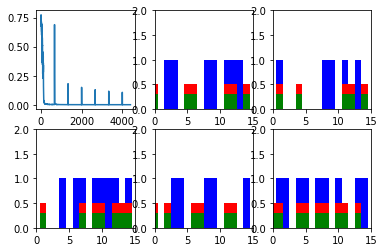

('Step', 500, 'Loss', 0.00016221406)


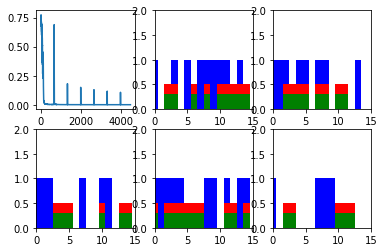

('Step', 600, 'Loss', 0.0001531731)


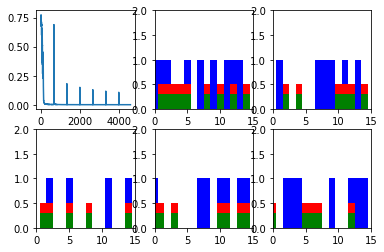

('New data, epoch', 7)
('Step', 0, 'Loss', 0.09858117)


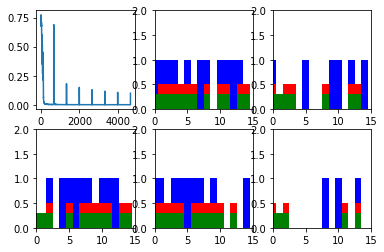

('Step', 100, 'Loss', 0.00016123336)


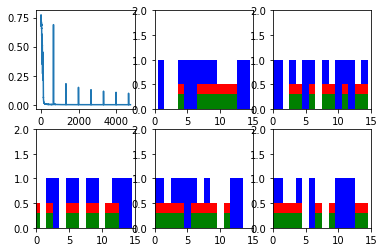

('Step', 200, 'Loss', 0.00014328439)


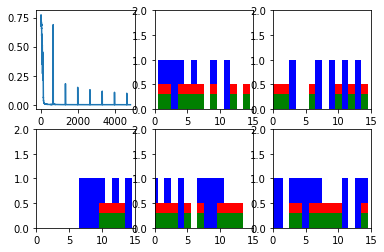

('Step', 300, 'Loss', 0.00013369297)


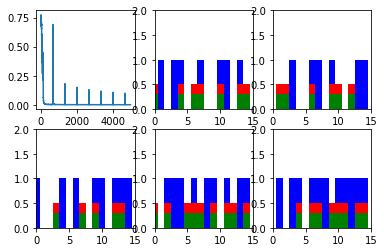

('Step', 400, 'Loss', 0.0001550003)


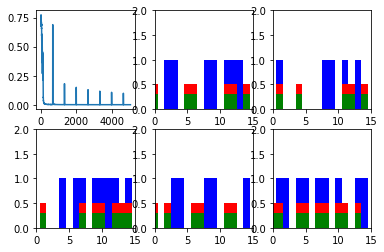

('Step', 500, 'Loss', 0.00014064186)


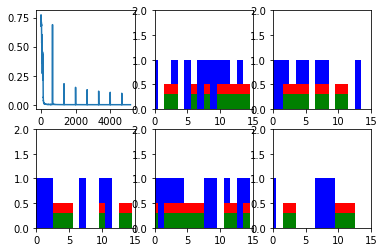

('Step', 600, 'Loss', 0.00013149608)


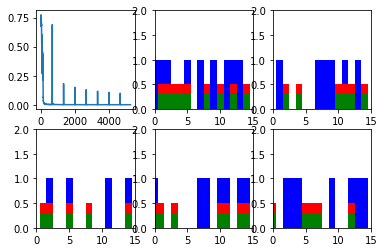

('New data, epoch', 8)
('Step', 0, 'Loss', 0.092042774)


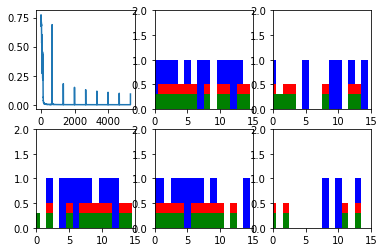

('Step', 100, 'Loss', 0.00014106875)


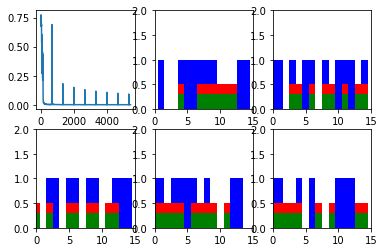

('Step', 200, 'Loss', 0.00012614235)


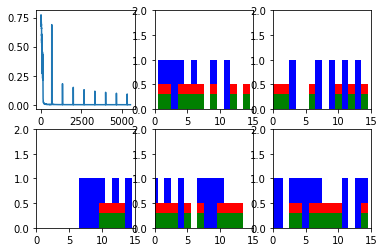

('Step', 300, 'Loss', 0.00011757721)


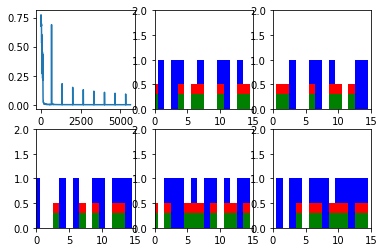

('Step', 400, 'Loss', 0.00013616246)


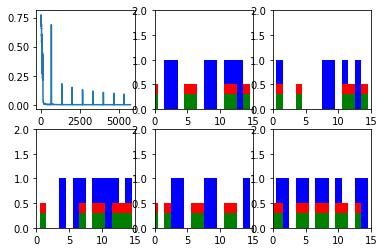

('Step', 500, 'Loss', 0.00012445157)


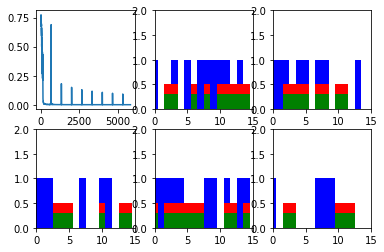

('Step', 600, 'Loss', 0.00011531529)


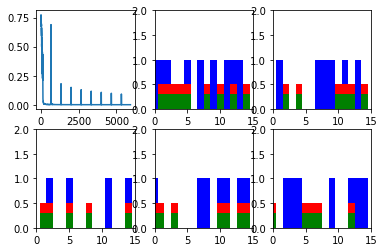

('New data, epoch', 9)
('Step', 0, 'Loss', 0.08689206)


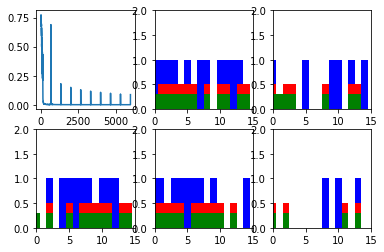

('Step', 100, 'Loss', 0.00012546418)


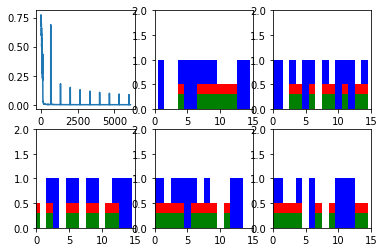

('Step', 200, 'Loss', 0.00011292208)


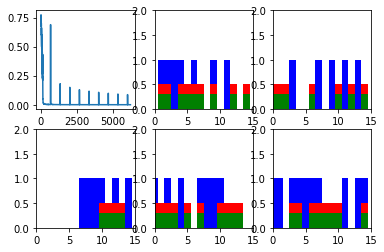

('Step', 300, 'Loss', 0.00010534032)


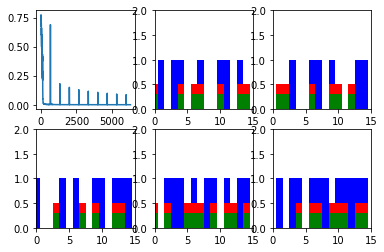

('Step', 400, 'Loss', 0.00012129359)


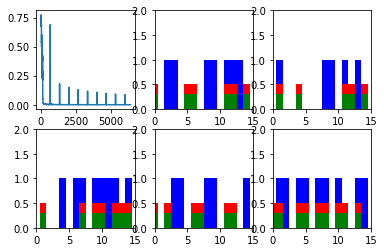

('Step', 500, 'Loss', 0.00011180962)


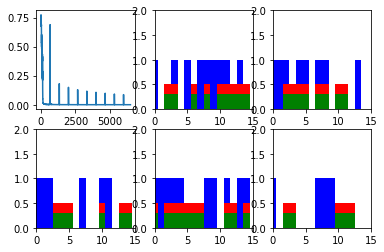

('Step', 600, 'Loss', 0.00010293861)


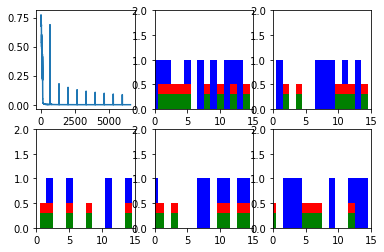

('New data, epoch', 10)
('Step', 0, 'Loss', 0.08285787)


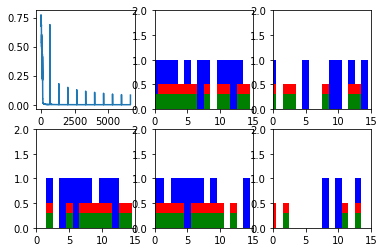

('Step', 100, 'Loss', 0.00011298812)


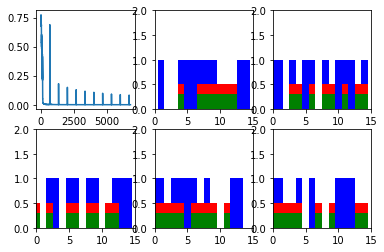

('Step', 200, 'Loss', 0.000102381025)


('Step', 300, 'Loss', 9.573661e-05)


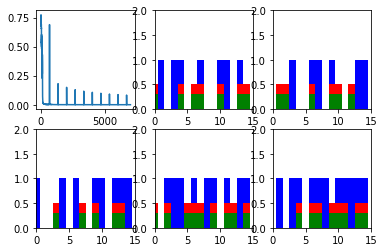

('Step', 400, 'Loss', 0.000109218025)


('Step', 500, 'Loss', 0.00010162917)


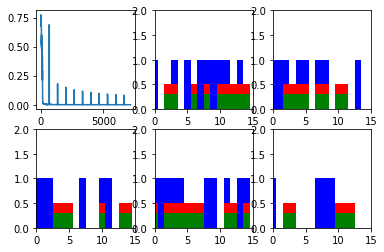

('Step', 600, 'Loss', 9.322998e-05)


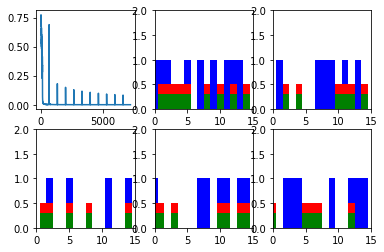

('New data, epoch', 11)
('Step', 0, 'Loss', 0.079683065)


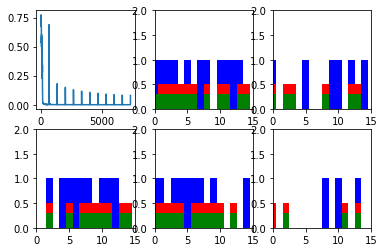

('Step', 100, 'Loss', 0.00010276046)


('Step', 200, 'Loss', 9.3716706e-05)


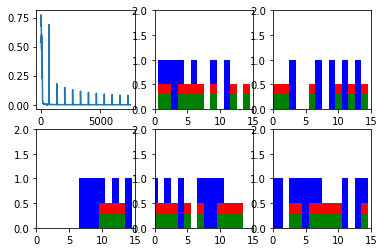

('Step', 300, 'Loss', 8.799059e-05)


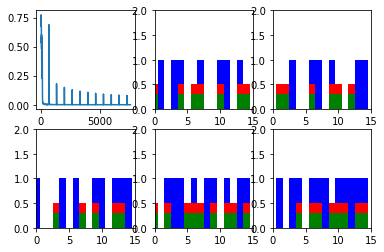

('Step', 400, 'Loss', 9.919379e-05)


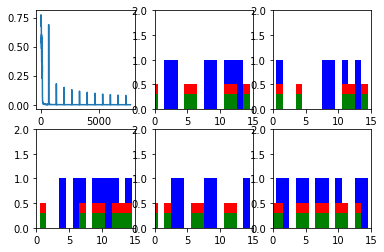

('Step', 500, 'Loss', 9.322694e-05)


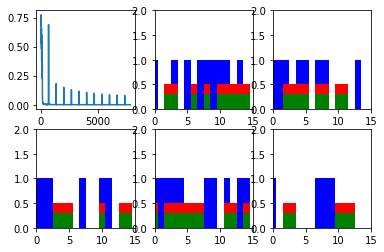

('Step', 600, 'Loss', 8.538222e-05)


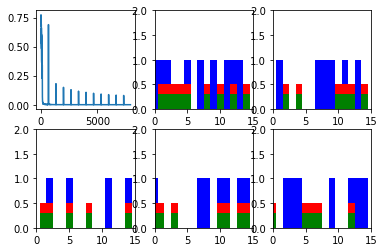

('New data, epoch', 12)
('Step', 0, 'Loss', 0.0771563)


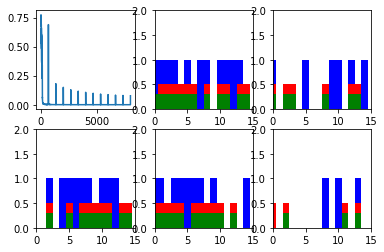

('Step', 100, 'Loss', 9.4178984e-05)


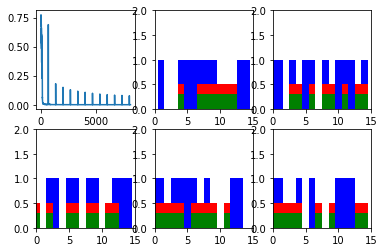

('Step', 200, 'Loss', 8.644448e-05)


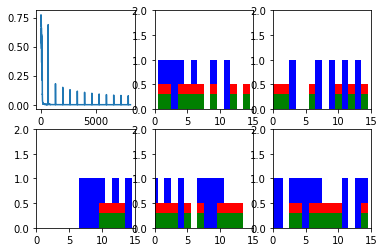

('Step', 300, 'Loss', 8.1538165e-05)


('Step', 400, 'Loss', 9.0691814e-05)


('Step', 500, 'Loss', 8.6158e-05)


('Step', 600, 'Loss', 7.888207e-05)


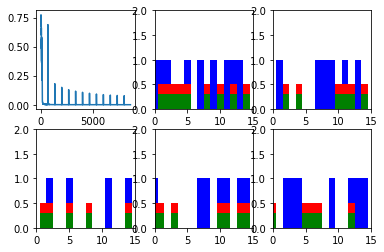

('New data, epoch', 13)
('Step', 0, 'Loss', 0.075115964)


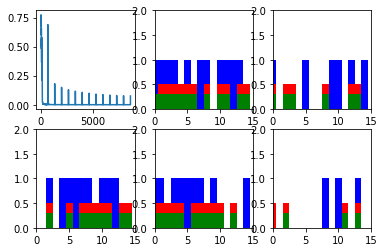

('Step', 100, 'Loss', 8.6895765e-05)


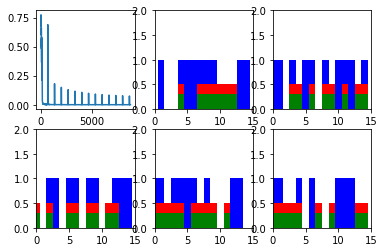

('Step', 200, 'Loss', 8.023539e-05)


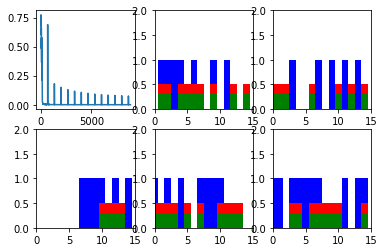

('Step', 300, 'Loss', 7.6042445e-05)


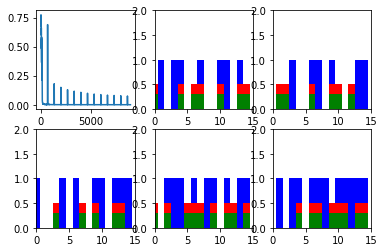

('Step', 400, 'Loss', 8.337049e-05)


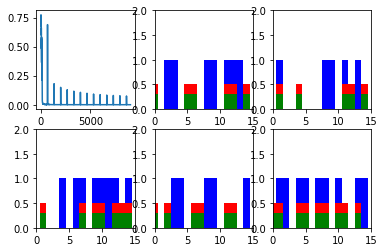

('Step', 500, 'Loss', 8.0085476e-05)


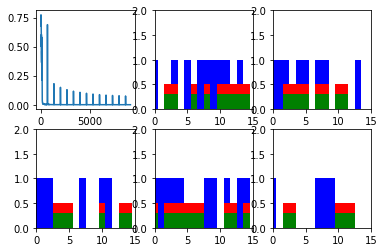

('Step', 600, 'Loss', 7.333702e-05)


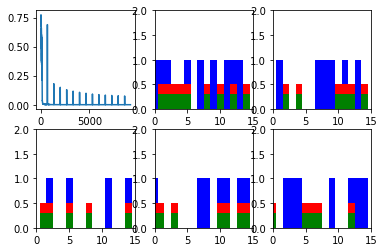

('New data, epoch', 14)
('Step', 0, 'Loss', 0.0734435)


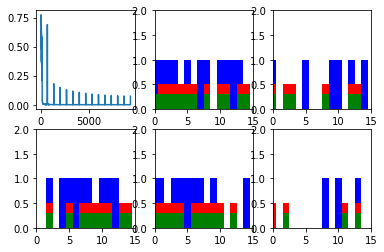

('Step', 100, 'Loss', 8.059459e-05)


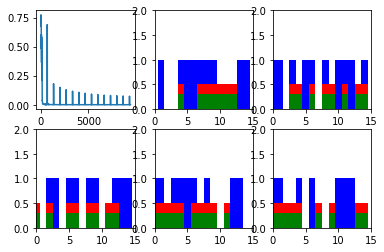

('Step', 200, 'Loss', 7.487014e-05)


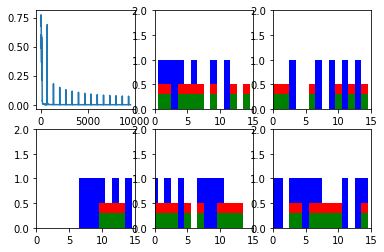

('Step', 300, 'Loss', 7.126505e-05)


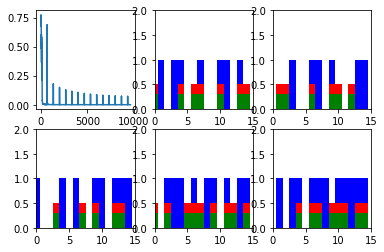

('Step', 400, 'Loss', 7.698671e-05)


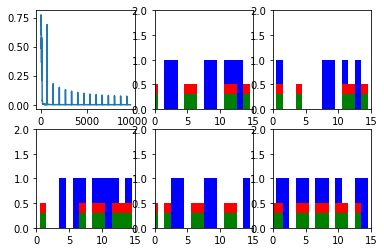

('Step', 500, 'Loss', 7.482661e-05)


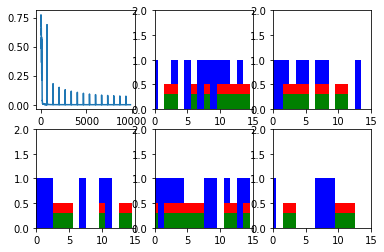

('Step', 600, 'Loss', 6.852145e-05)


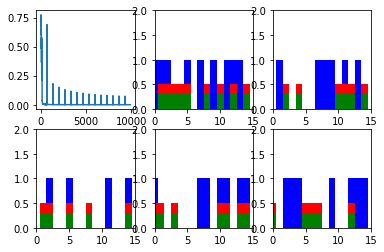

('New data, epoch', 15)
('Step', 0, 'Loss', 0.07205263)


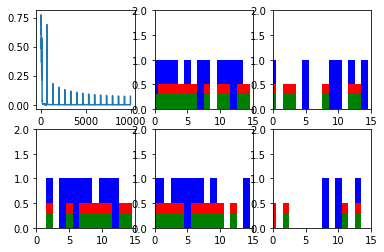

('Step', 100, 'Loss', 7.510543e-05)


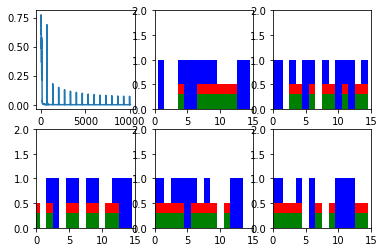

('Step', 200, 'Loss', 7.0165996e-05)


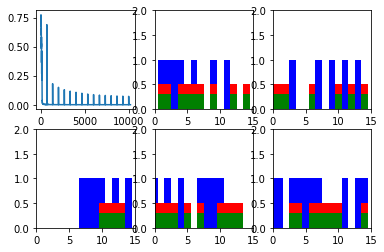

('Step', 300, 'Loss', 6.7047076e-05)


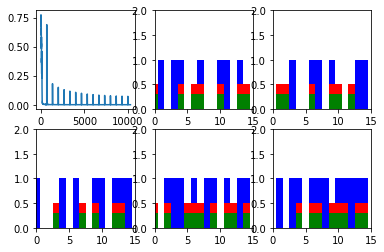

('Step', 400, 'Loss', 7.137682e-05)


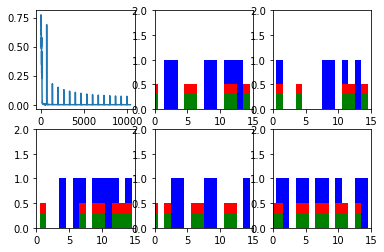

('Step', 500, 'Loss', 7.0189104e-05)


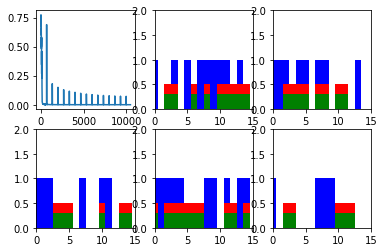

('Step', 600, 'Loss', 6.425418e-05)


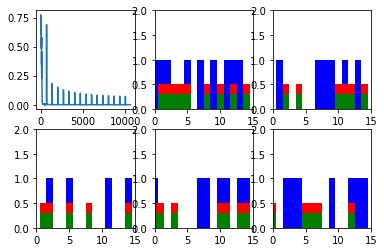

('New data, epoch', 16)
('Step', 0, 'Loss', 0.070880435)


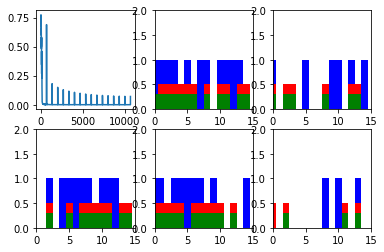

('Step', 100, 'Loss', 7.0267815e-05)


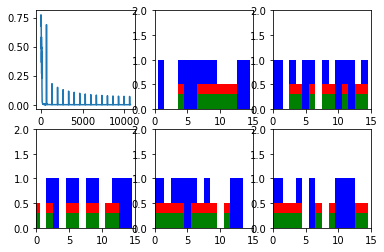

('Step', 200, 'Loss', 6.600535e-05)


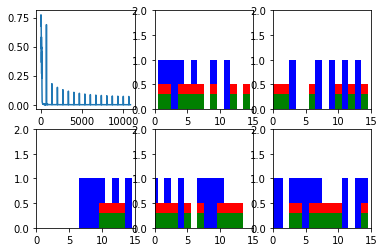

('Step', 300, 'Loss', 6.32725e-05)


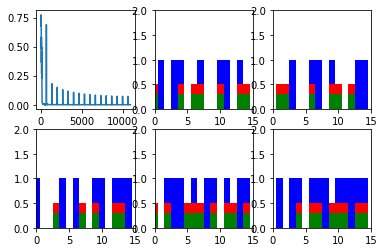

('Step', 400, 'Loss', 6.639938e-05)


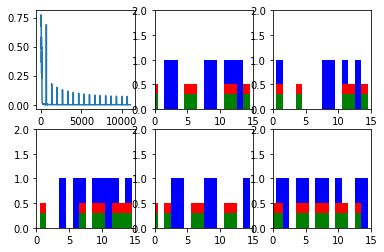

('Step', 500, 'Loss', 6.6084e-05)


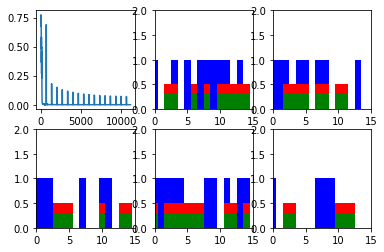

('Step', 600, 'Loss', 6.0438277e-05)


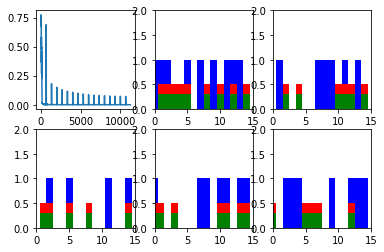

('New data, epoch', 17)
('Step', 0, 'Loss', 0.069880955)


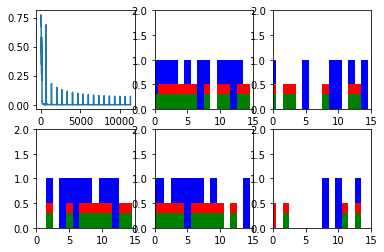

('Step', 100, 'Loss', 6.5978464e-05)


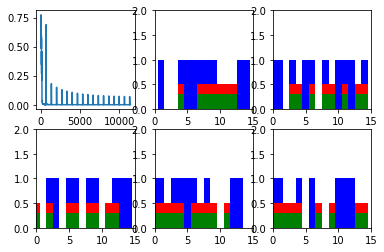

('Step', 200, 'Loss', 6.2321444e-05)


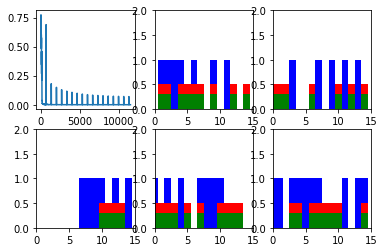

('Step', 300, 'Loss', 5.9842798e-05)


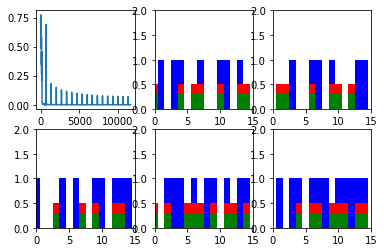

('Step', 400, 'Loss', 6.1976534e-05)


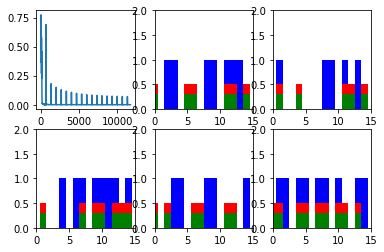

('Step', 500, 'Loss', 6.240004e-05)


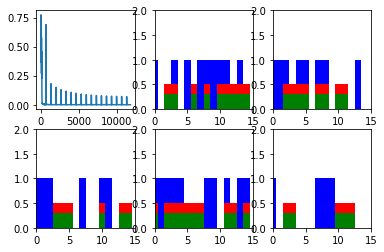

('Step', 600, 'Loss', 5.699587e-05)


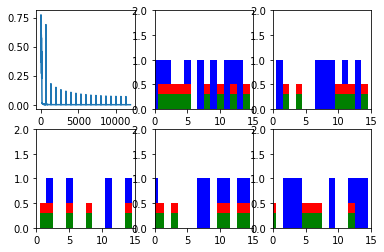

('New data, epoch', 18)
('Step', 0, 'Loss', 0.069019735)


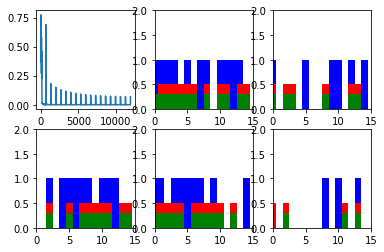

('Step', 100, 'Loss', 6.2161074e-05)


('Step', 200, 'Loss', 5.9006237e-05)


('Step', 300, 'Loss', 5.6764322e-05)


('Step', 400, 'Loss', 5.803838e-05)


('Step', 500, 'Loss', 5.9083177e-05)


('Step', 600, 'Loss', 5.386337e-05)


('New data, epoch', 19)
('Step', 0, 'Loss', 0.068270795)


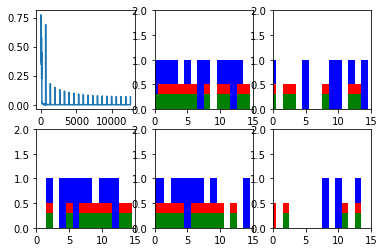

('Step', 100, 'Loss', 5.8723497e-05)


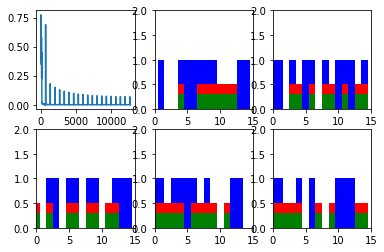

('Step', 200, 'Loss', 5.602158e-05)


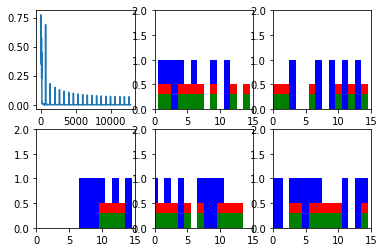

('Step', 300, 'Loss', 5.3930595e-05)


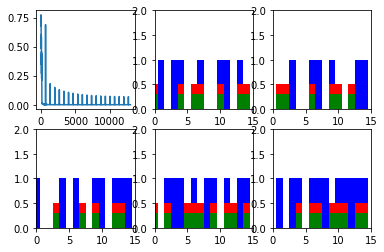

('Step', 400, 'Loss', 5.4502278e-05)


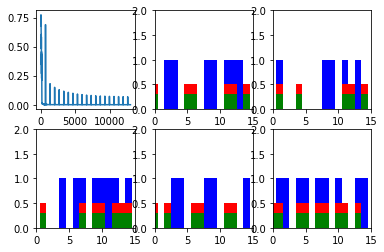

('Step', 500, 'Loss', 5.607623e-05)


('Step', 600, 'Loss', 5.1001058e-05)


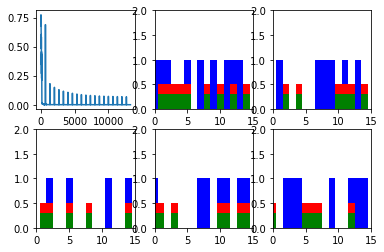

('New data, epoch', 20)
('Step', 0, 'Loss', 0.06761436)


('Step', 100, 'Loss', 5.562124e-05)


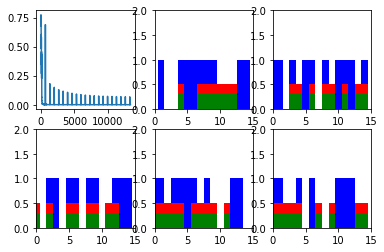

('Step', 200, 'Loss', 5.3318225e-05)


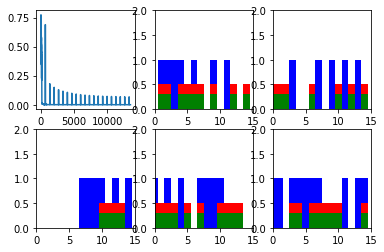

('Step', 300, 'Loss', 5.134638e-05)


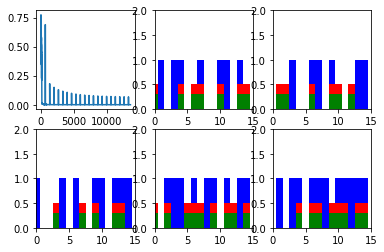

('Step', 400, 'Loss', 5.1344396e-05)


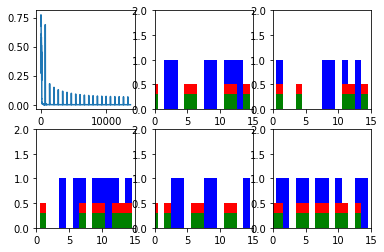

('Step', 500, 'Loss', 5.3341035e-05)


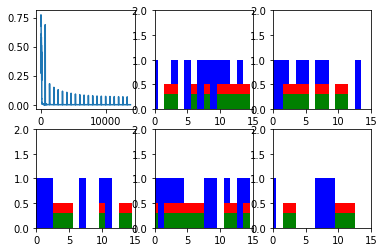

('Step', 600, 'Loss', 4.8378733e-05)


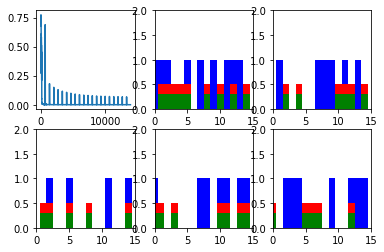

('New data, epoch', 21)
('Step', 0, 'Loss', 0.067034915)


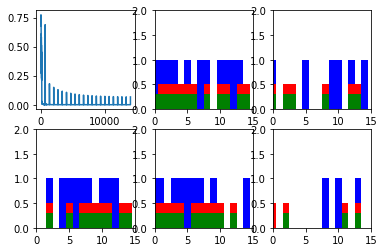

('Step', 100, 'Loss', 5.2814576e-05)


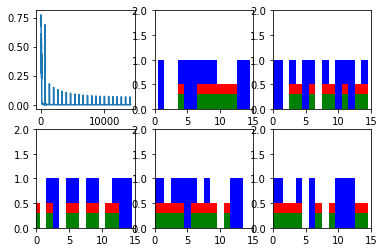

('Step', 200, 'Loss', 5.0867537e-05)


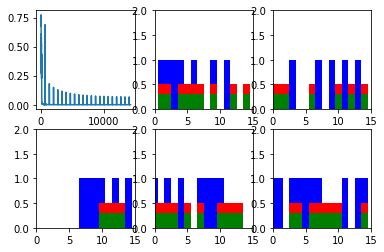

('Step', 300, 'Loss', 4.8957645e-05)


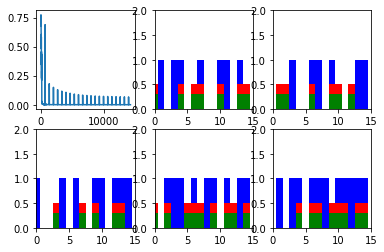

('Step', 400, 'Loss', 4.8509115e-05)


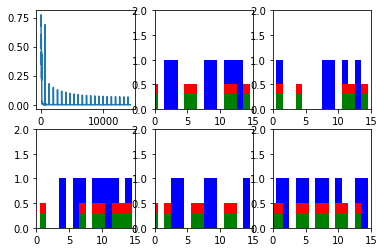

('Step', 500, 'Loss', 5.0848997e-05)


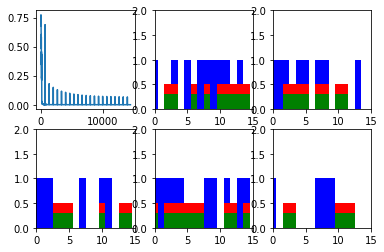

('Step', 600, 'Loss', 4.596142e-05)


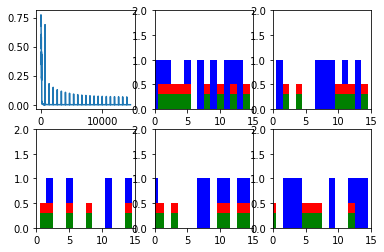

('New data, epoch', 22)
('Step', 0, 'Loss', 0.0665201)


('Step', 100, 'Loss', 5.0262184e-05)


('Step', 200, 'Loss', 4.861393e-05)


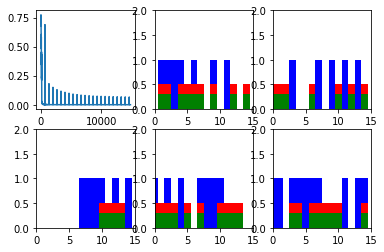

('Step', 300, 'Loss', 4.6756446e-05)


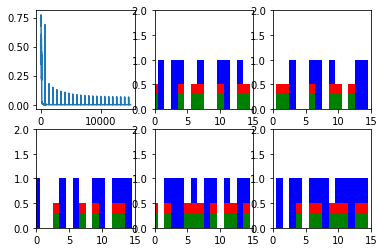

('Step', 400, 'Loss', 4.595831e-05)


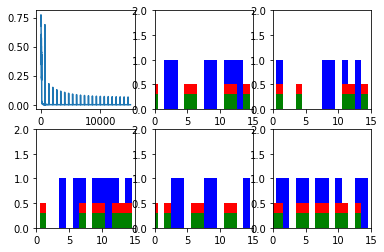

('Step', 500, 'Loss', 4.855085e-05)


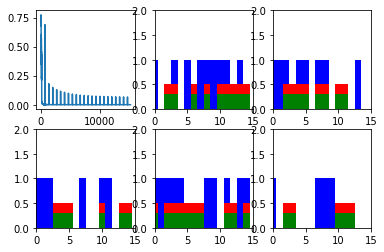

('Step', 600, 'Loss', 4.373006e-05)


('New data, epoch', 23)
('Step', 0, 'Loss', 0.06606023)


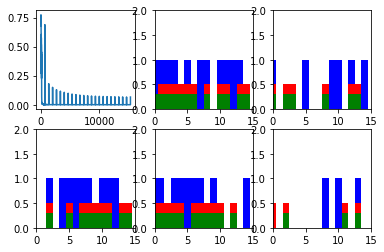

('Step', 100, 'Loss', 4.7917976e-05)


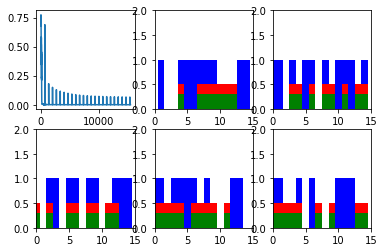

('Step', 200, 'Loss', 4.6546254e-05)


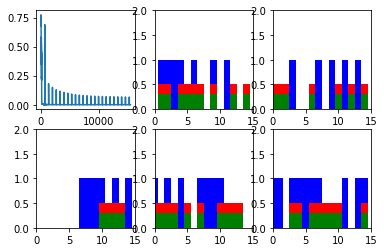

('Step', 300, 'Loss', 4.4728473e-05)


('Step', 400, 'Loss', 4.365224e-05)


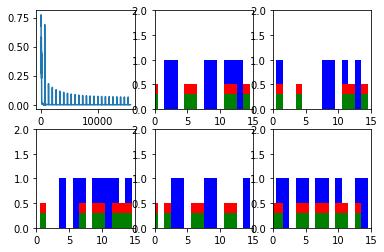

('Step', 500, 'Loss', 4.644659e-05)


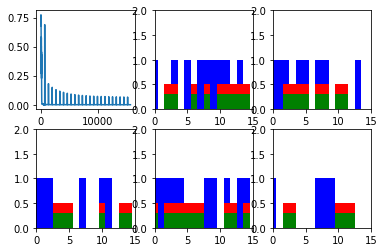

('Step', 600, 'Loss', 4.1673517e-05)


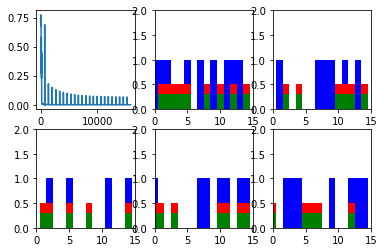

('New data, epoch', 24)
('Step', 0, 'Loss', 0.06564734)


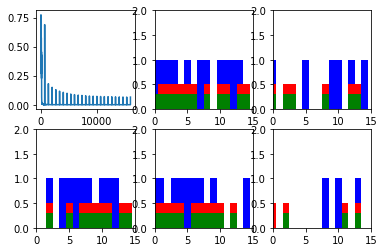

('Step', 100, 'Loss', 4.578355e-05)


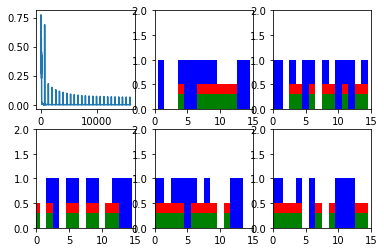

('Step', 200, 'Loss', 4.4654986e-05)


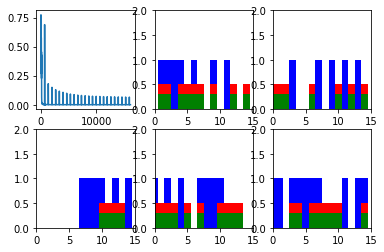

('Step', 300, 'Loss', 4.28483e-05)


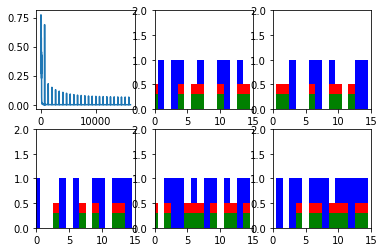

('Step', 400, 'Loss', 4.1576608e-05)


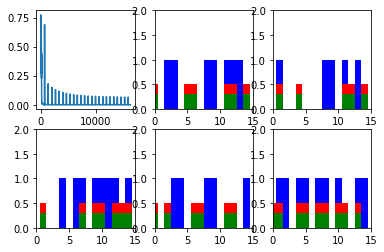

('Step', 500, 'Loss', 4.4501256e-05)


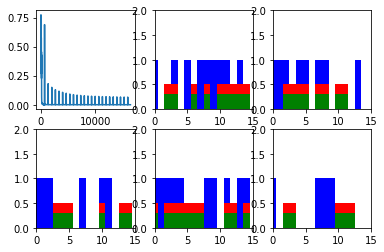

('Step', 600, 'Loss', 3.9766353e-05)


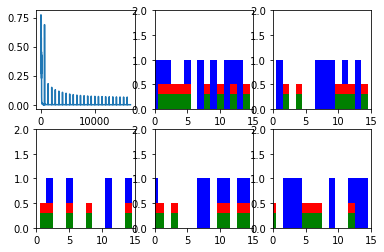

('New data, epoch', 25)
('Step', 0, 'Loss', 0.06527503)


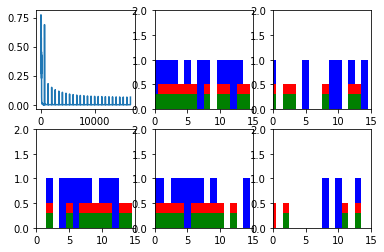

('Step', 100, 'Loss', 4.3814398e-05)


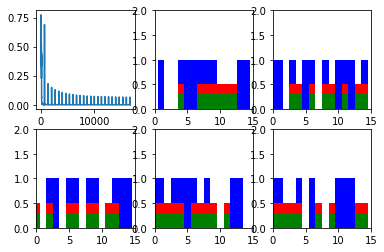

('Step', 200, 'Loss', 4.2908337e-05)


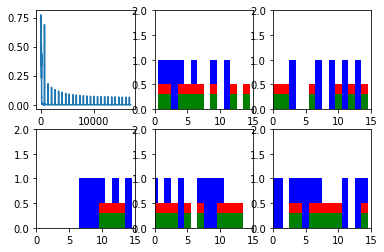

('Step', 300, 'Loss', 4.1109583e-05)


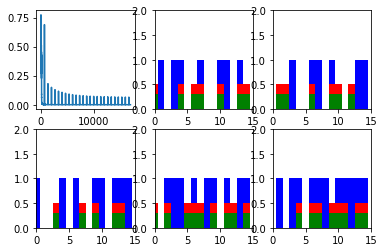

('Step', 400, 'Loss', 3.9699626e-05)


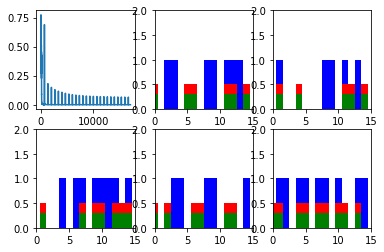

('Step', 500, 'Loss', 4.2698957e-05)


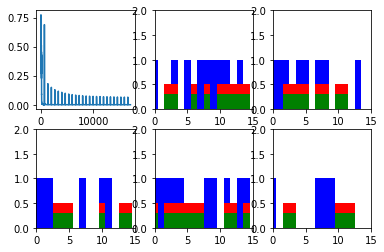

('Step', 600, 'Loss', 3.800541e-05)


('New data, epoch', 26)
('Step', 0, 'Loss', 0.06493791)


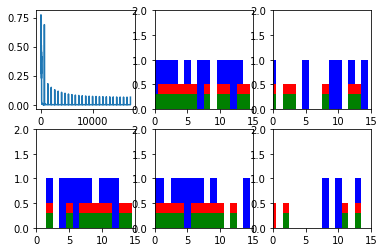

('Step', 100, 'Loss', 4.1997817e-05)


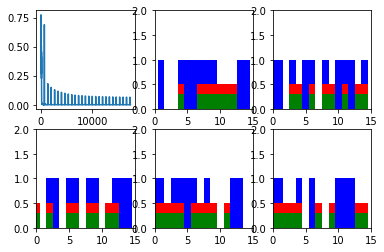

('Step', 200, 'Loss', 4.127612e-05)


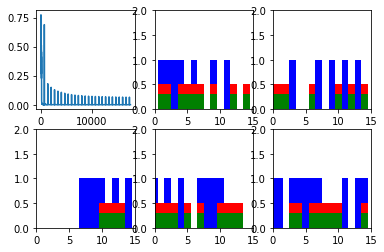

('Step', 300, 'Loss', 3.9490056e-05)


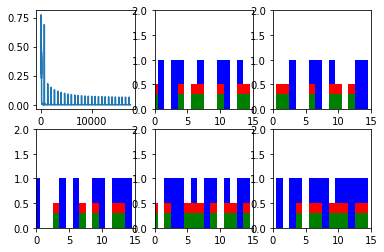

('Step', 400, 'Loss', 3.800541e-05)


('Step', 500, 'Loss', 4.1022213e-05)


('Step', 600, 'Loss', 3.6374782e-05)


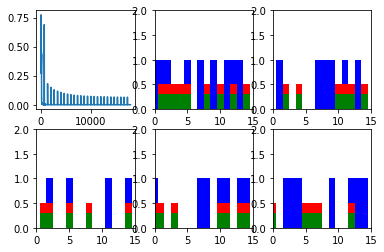

('New data, epoch', 27)
('Step', 0, 'Loss', 0.06463153)


('Step', 100, 'Loss', 4.0311552e-05)


('Step', 200, 'Loss', 3.9769446e-05)


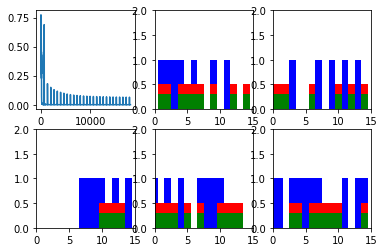

('Step', 300, 'Loss', 3.7972233e-05)


('Step', 400, 'Loss', 3.6454232e-05)


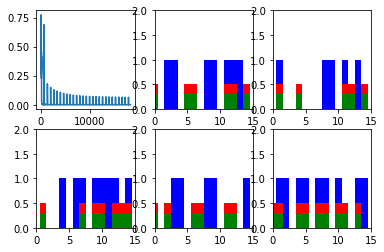

('Step', 500, 'Loss', 3.9478968e-05)


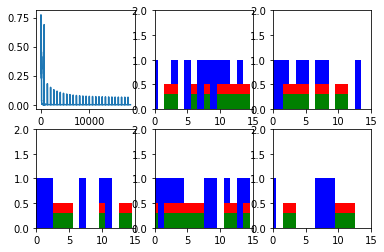

('Step', 600, 'Loss', 3.485858e-05)


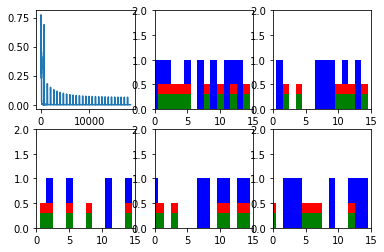

('New data, epoch', 28)
('Step', 0, 'Loss', 0.06435216)


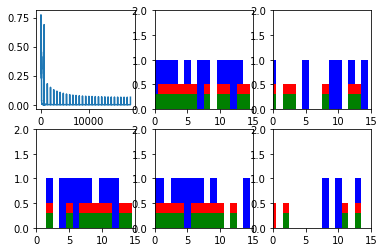

('Step', 100, 'Loss', 3.875879e-05)


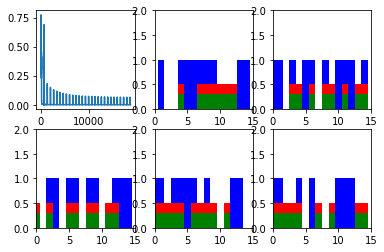

('Step', 200, 'Loss', 3.8369257e-05)


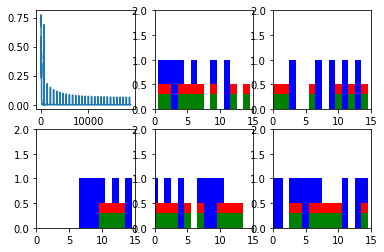

('Step', 300, 'Loss', 3.657203e-05)


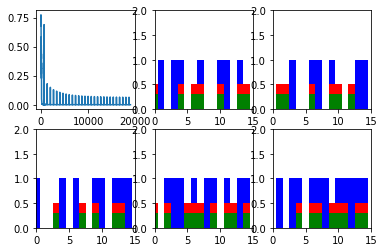

('Step', 400, 'Loss', 3.5049263e-05)


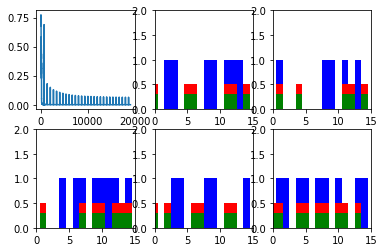

('Step', 500, 'Loss', 3.8024722e-05)


('Step', 600, 'Loss', 3.3444085e-05)


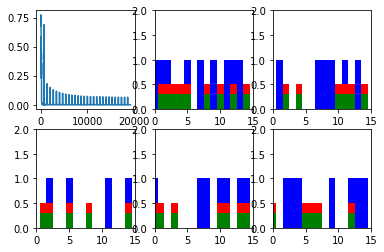

('New data, epoch', 29)
('Step', 0, 'Loss', 0.06409664)


('Step', 100, 'Loss', 3.7304555e-05)


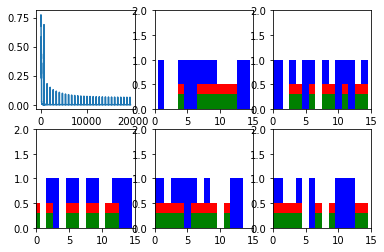

('Step', 200, 'Loss', 3.7066013e-05)


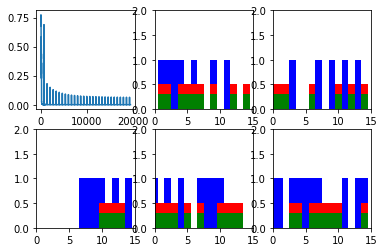

('Step', 300, 'Loss', 3.5262412e-05)


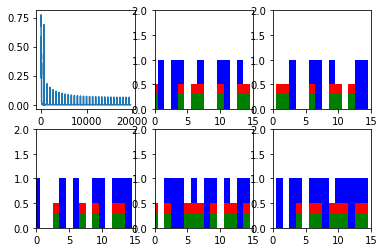

('Step', 400, 'Loss', 3.3760316e-05)


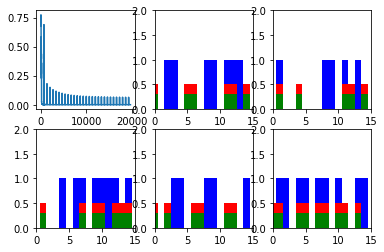

('Step', 500, 'Loss', 3.6669015e-05)


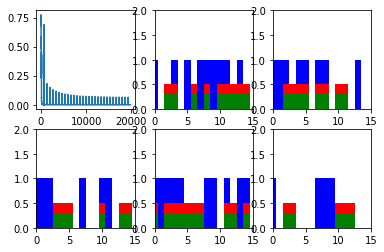

('Step', 600, 'Loss', 3.2139254e-05)


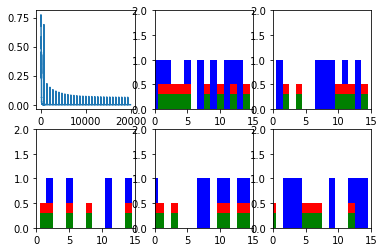

('New data, epoch', 30)
('Step', 0, 'Loss', 0.0638622)


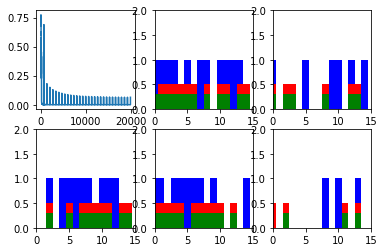

('Step', 100, 'Loss', 3.595363e-05)


('Step', 200, 'Loss', 3.5854948e-05)


('Step', 300, 'Loss', 3.4029075e-05)


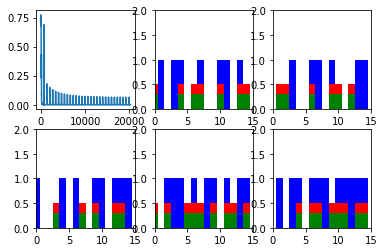

('Step', 400, 'Loss', 3.257626e-05)


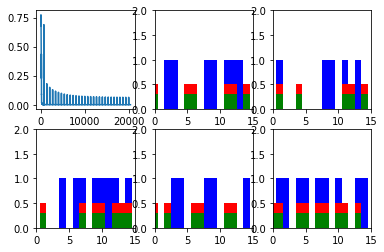

('Step', 500, 'Loss', 3.5395944e-05)


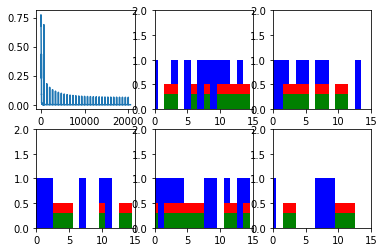

('Step', 600, 'Loss', 3.0918647e-05)


('New data, epoch', 31)
('Step', 0, 'Loss', 0.06364651)


('Step', 100, 'Loss', 3.4690107e-05)


('Step', 200, 'Loss', 3.4702683e-05)


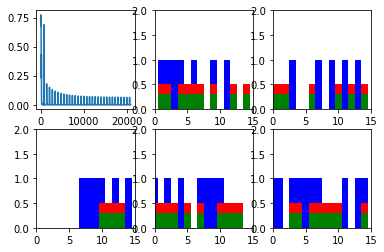

('Step', 300, 'Loss', 3.288633e-05)


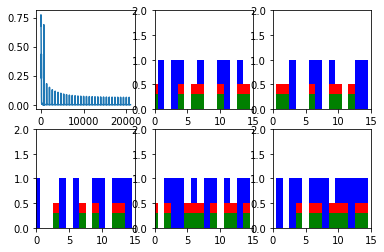

('Step', 400, 'Loss', 3.1492324e-05)


('Step', 500, 'Loss', 3.421506e-05)


('Step', 600, 'Loss', 2.9775916e-05)


('New data, epoch', 32)
('Step', 0, 'Loss', 0.06344767)


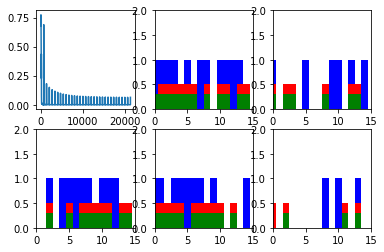

('Step', 100, 'Loss', 3.351877e-05)


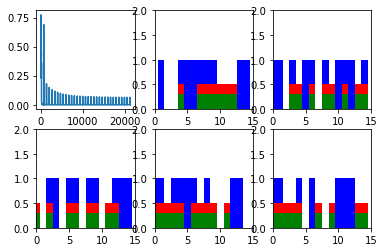

('Step', 200, 'Loss', 3.36426e-05)


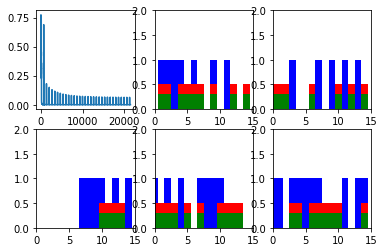

('Step', 300, 'Loss', 3.1797626e-05)


('Step', 400, 'Loss', 3.0500572e-05)


('Step', 500, 'Loss', 3.3092976e-05)


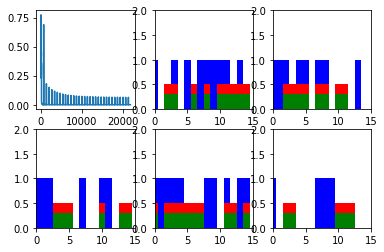

('Step', 600, 'Loss', 2.8720595e-05)


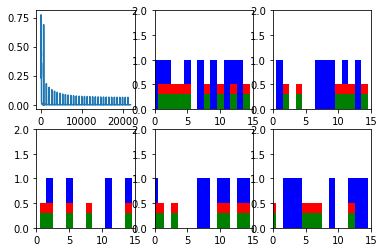

('New data, epoch', 33)
('Step', 0, 'Loss', 0.063263856)


('Step', 100, 'Loss', 3.2404638e-05)


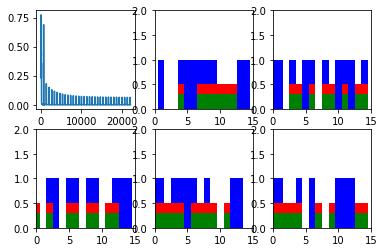

('Step', 200, 'Loss', 3.2630192e-05)


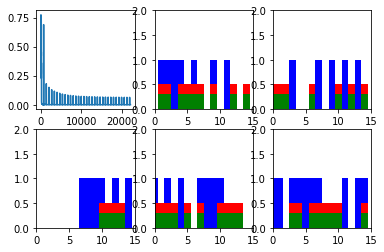

('Step', 300, 'Loss', 3.0786796e-05)


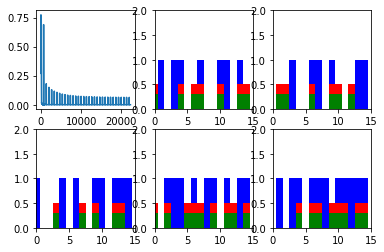

('Step', 400, 'Loss', 2.9580338e-05)


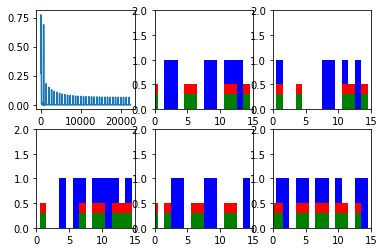

('Step', 500, 'Loss', 3.2039232e-05)


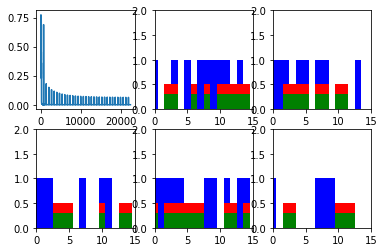

('Step', 600, 'Loss', 2.7730432e-05)


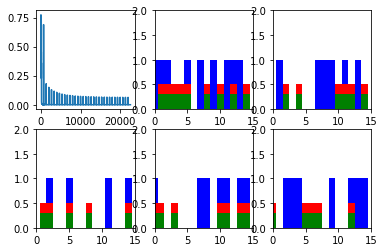

('New data, epoch', 34)
('Step', 0, 'Loss', 0.06309359)


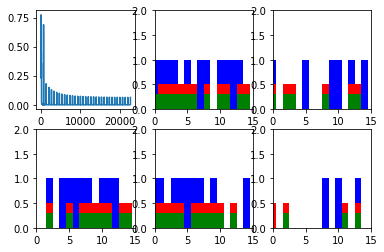

('Step', 100, 'Loss', 3.1365213e-05)


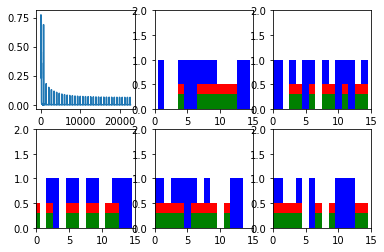

('Step', 200, 'Loss', 3.1678177e-05)


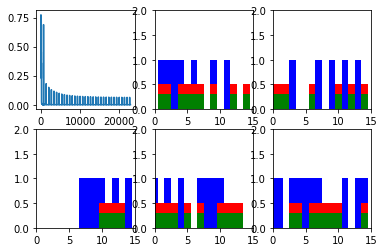

('Step', 300, 'Loss', 2.983318e-05)


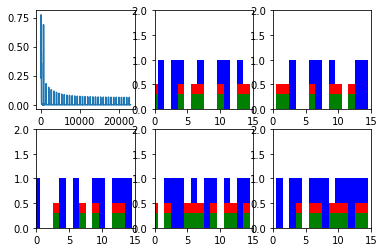

('Step', 400, 'Loss', 2.8734807e-05)


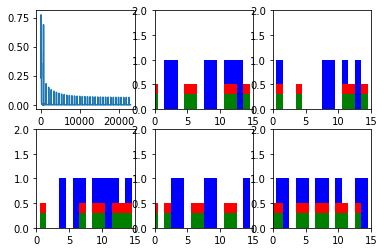

('Step', 500, 'Loss', 3.105701e-05)


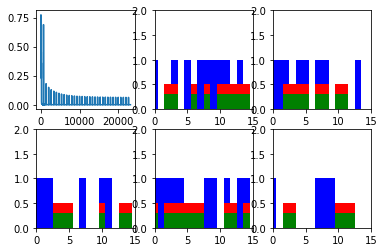

('Step', 600, 'Loss', 2.6795895e-05)


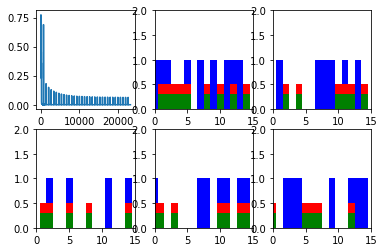

('New data, epoch', 35)
('Step', 0, 'Loss', 0.06293552)


('Step', 100, 'Loss', 3.0390944e-05)


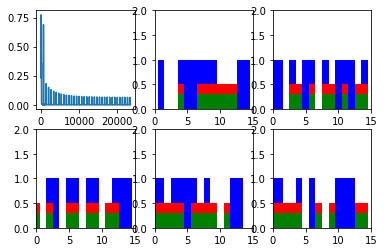

('Step', 200, 'Loss', 3.079292e-05)


('Step', 300, 'Loss', 2.8928831e-05)


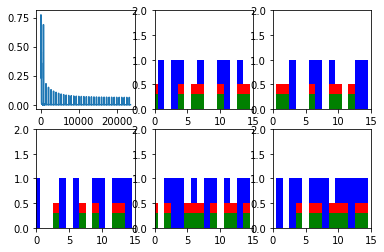

('Step', 400, 'Loss', 2.7940127e-05)


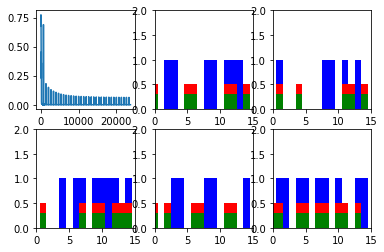

('Step', 500, 'Loss', 3.0124054e-05)


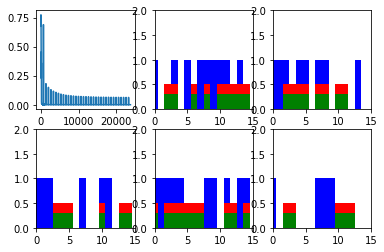

('Step', 600, 'Loss', 2.5924925e-05)


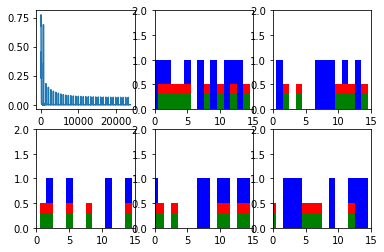

('New data, epoch', 36)
('Step', 0, 'Loss', 0.06278842)


('Step', 100, 'Loss', 2.946912e-05)


('Step', 200, 'Loss', 2.9944205e-05)


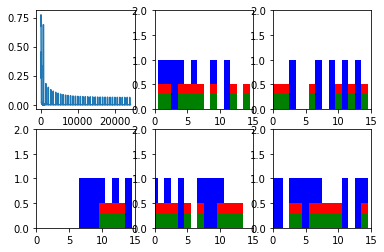

('Step', 300, 'Loss', 2.8089646e-05)


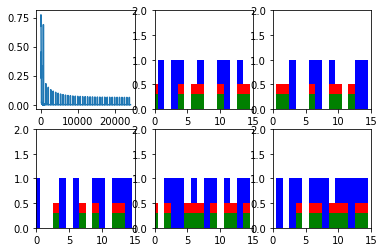

('Step', 400, 'Loss', 2.720743e-05)


('Step', 500, 'Loss', 2.923719e-05)


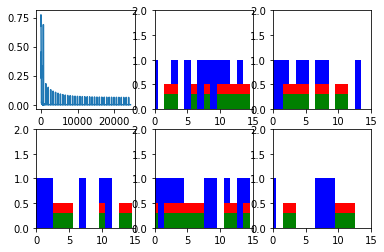

('Step', 600, 'Loss', 2.5104817e-05)


('New data, epoch', 37)
('Step', 0, 'Loss', 0.06265141)


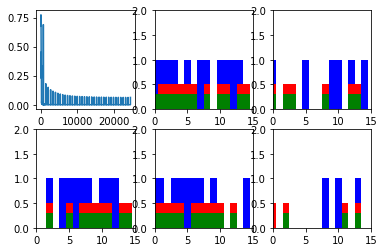

('Step', 100, 'Loss', 2.8594974e-05)


('Step', 200, 'Loss', 2.9154302e-05)


('Step', 300, 'Loss', 2.7288608e-05)


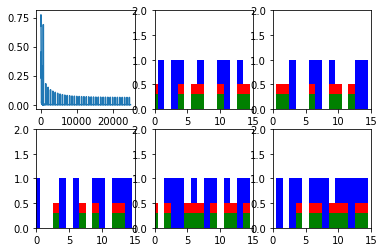

('Step', 400, 'Loss', 2.6525595e-05)


('Step', 500, 'Loss', 2.8398006e-05)


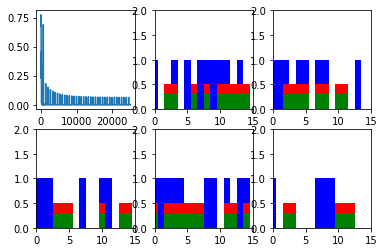

('Step', 600, 'Loss', 2.4335564e-05)


('New data, epoch', 38)
('Step', 0, 'Loss', 0.062523484)


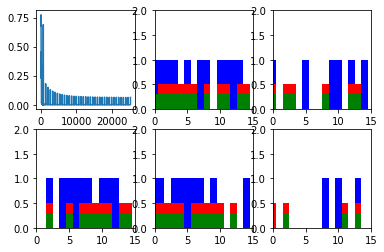

('Step', 100, 'Loss', 2.7776458e-05)


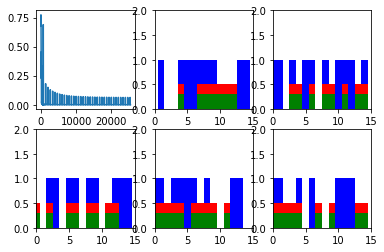

('Step', 200, 'Loss', 2.8391416e-05)


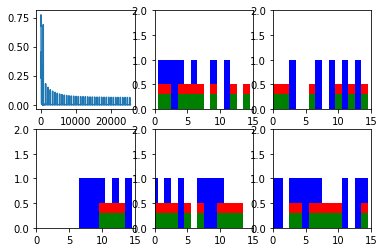

('Step', 300, 'Loss', 2.6530477e-05)


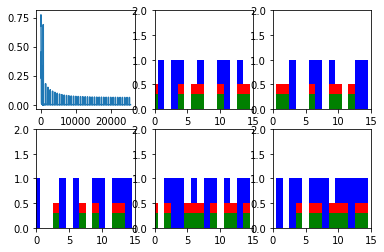

('Step', 400, 'Loss', 2.5891435e-05)


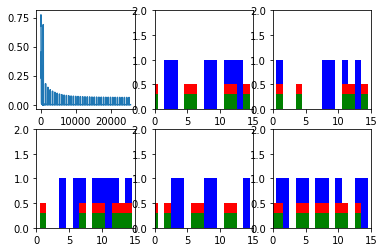

('Step', 500, 'Loss', 2.7604907e-05)


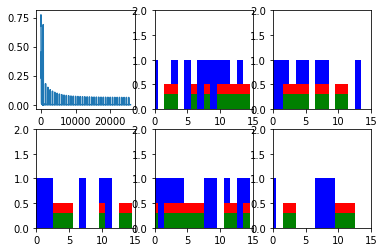

('Step', 600, 'Loss', 2.3615581e-05)


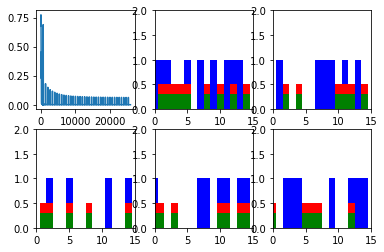

('New data, epoch', 39)
('Step', 0, 'Loss', 0.062403824)


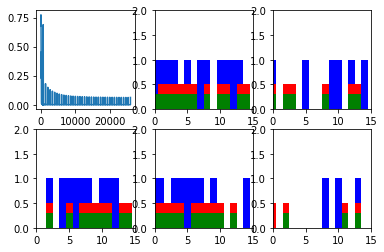

('Step', 100, 'Loss', 2.699608e-05)


('Step', 200, 'Loss', 2.7679389e-05)


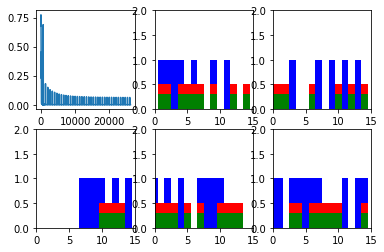

('Step', 300, 'Loss', 2.58089e-05)


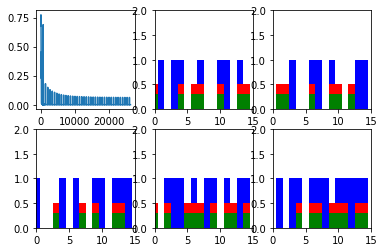

('Step', 400, 'Loss', 2.5295421e-05)


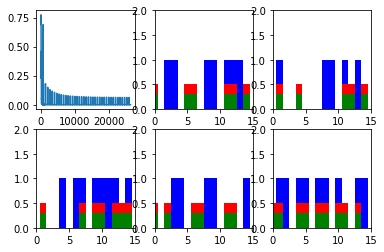

('Step', 500, 'Loss', 2.6856316e-05)


('Step', 600, 'Loss', 2.2927381e-05)


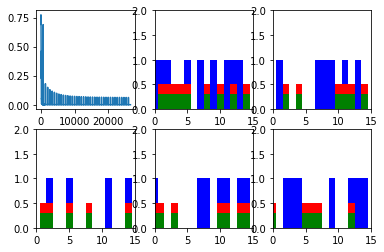

('New data, epoch', 40)
('Step', 0, 'Loss', 0.062291693)


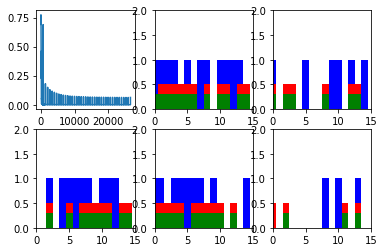

('Step', 100, 'Loss', 2.6261798e-05)


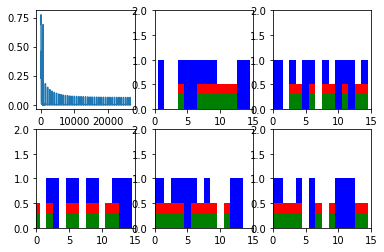

('Step', 200, 'Loss', 2.7007089e-05)


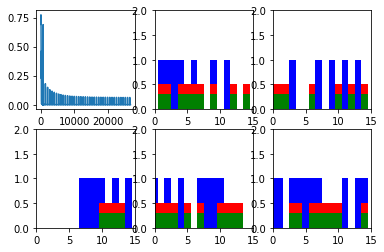

('Step', 300, 'Loss', 2.512706e-05)


('Step', 400, 'Loss', 2.474073e-05)


('Step', 500, 'Loss', 2.6144276e-05)


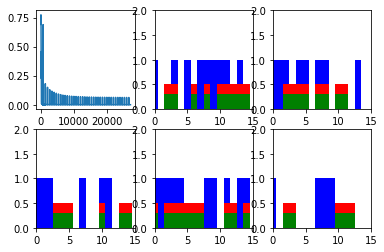

('Step', 600, 'Loss', 2.229481e-05)


('New data, epoch', 41)
('Step', 0, 'Loss', 0.062186502)


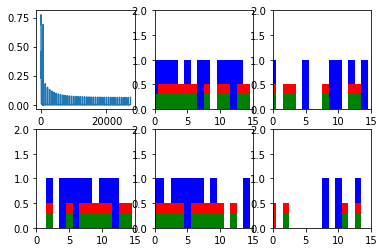

('Step', 100, 'Loss', 2.5559299e-05)


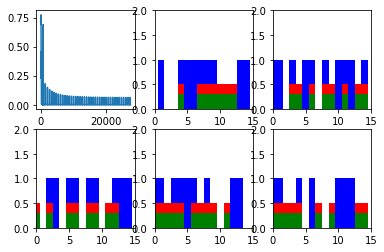

('Step', 200, 'Loss', 2.635863e-05)


('Step', 300, 'Loss', 2.4478593e-05)


('Step', 400, 'Loss', 2.4208286e-05)


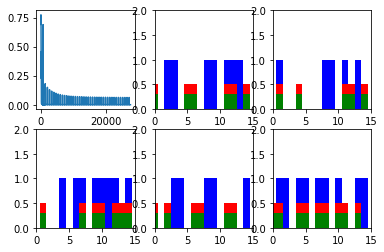

('Step', 500, 'Loss', 2.5464025e-05)


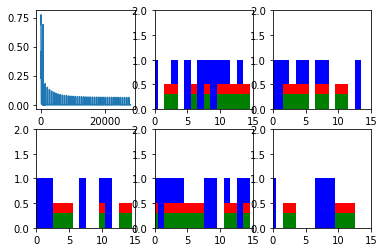

('Step', 600, 'Loss', 2.1690847e-05)


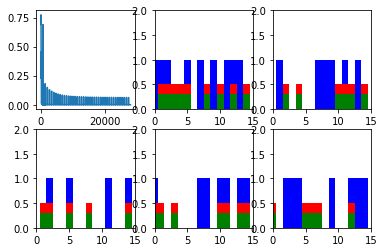

('New data, epoch', 42)
('Step', 0, 'Loss', 0.062087644)


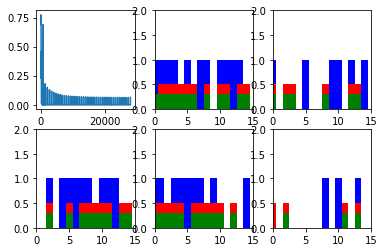

('Step', 100, 'Loss', 2.4893354e-05)


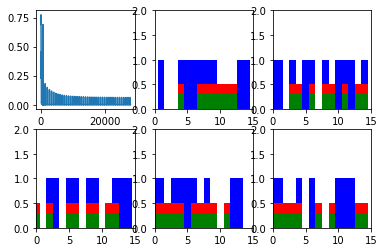

('Step', 200, 'Loss', 2.5740374e-05)


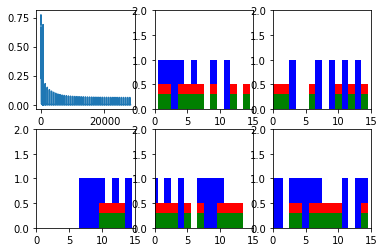

('Step', 300, 'Loss', 2.3863504e-05)


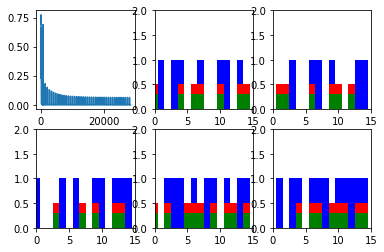

('Step', 400, 'Loss', 2.3726703e-05)


('Step', 500, 'Loss', 2.481715e-05)


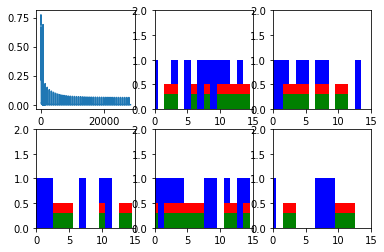

('Step', 600, 'Loss', 2.1118667e-05)


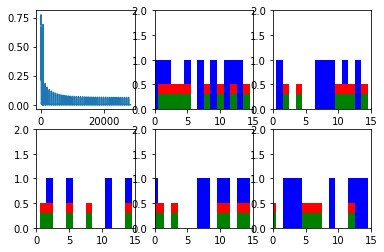

('New data, epoch', 43)
('Step', 0, 'Loss', 0.061994597)


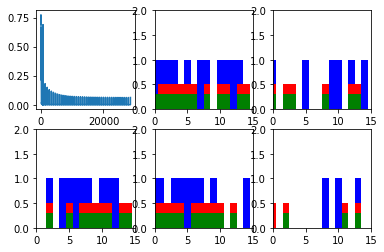

('Step', 100, 'Loss', 2.4260788e-05)


('Step', 200, 'Loss', 2.5160258e-05)


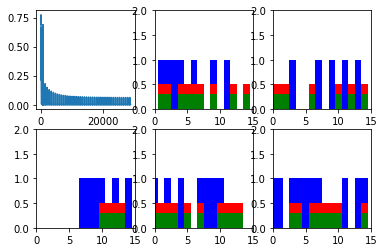

('Step', 300, 'Loss', 2.3277022e-05)


('Step', 400, 'Loss', 2.326419e-05)


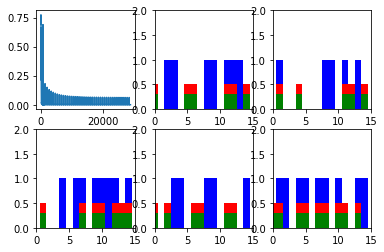

('Step', 500, 'Loss', 2.4194112e-05)


('Step', 600, 'Loss', 2.057351e-05)


('New data, epoch', 44)
('Step', 0, 'Loss', 0.061906867)


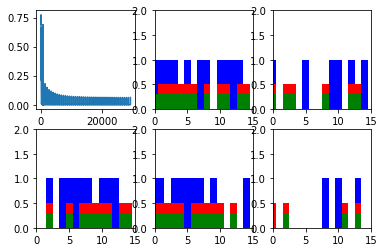

('Step', 100, 'Loss', 2.3663184e-05)


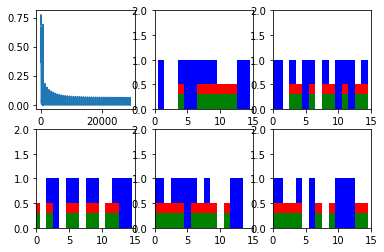

('Step', 200, 'Loss', 2.4599212e-05)


('Step', 300, 'Loss', 2.2719149e-05)


('Step', 400, 'Loss', 2.2825523e-05)


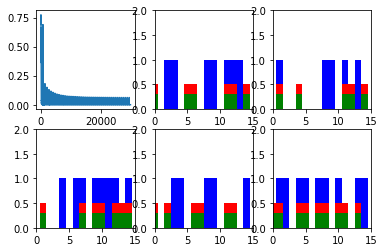

('Step', 500, 'Loss', 2.361558e-05)


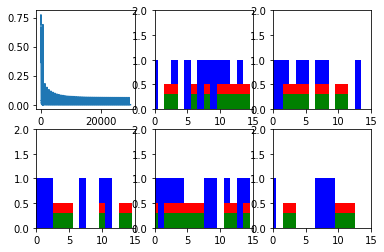

('Step', 600, 'Loss', 2.00506e-05)


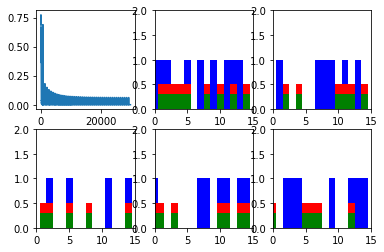

('New data, epoch', 45)
('Step', 0, 'Loss', 0.06182408)


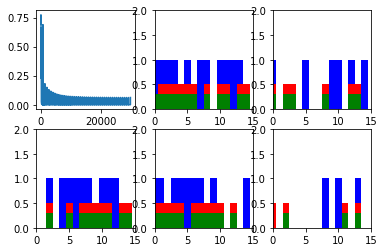

('Step', 100, 'Loss', 2.3083065e-05)


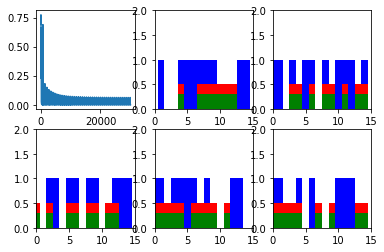

('Step', 200, 'Loss', 2.4068366e-05)


('Step', 300, 'Loss', 2.2193062e-05)


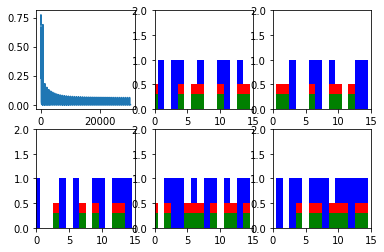

('Step', 400, 'Loss', 2.2420225e-05)


('Step', 500, 'Loss', 2.3054527e-05)


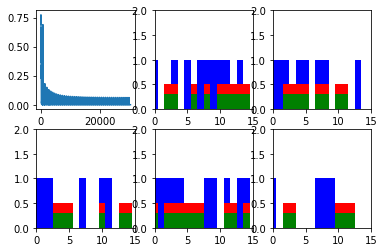

('Step', 600, 'Loss', 1.956107e-05)


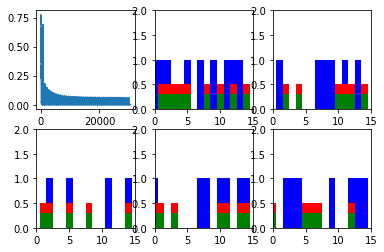

('New data, epoch', 46)
('Step', 0, 'Loss', 0.061745796)


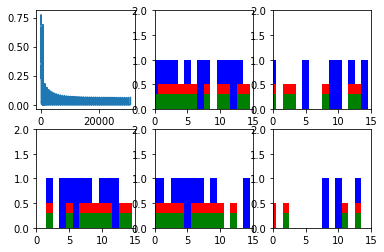

('Step', 100, 'Loss', 2.253314e-05)


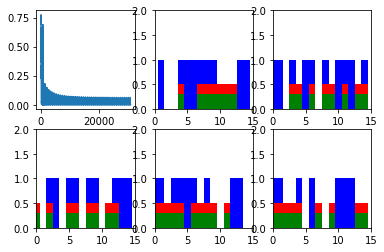

('Step', 200, 'Loss', 2.3543873e-05)


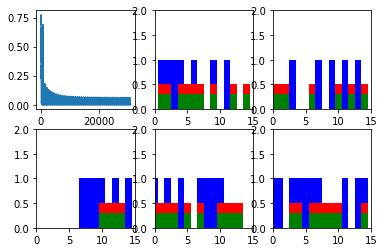

('Step', 300, 'Loss', 2.1676511e-05)


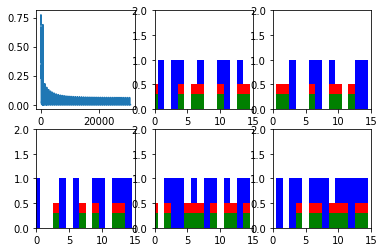

('Step', 400, 'Loss', 2.2030823e-05)


('Step', 500, 'Loss', 2.250937e-05)


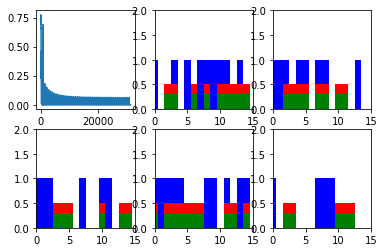

('Step', 600, 'Loss', 1.9100144e-05)


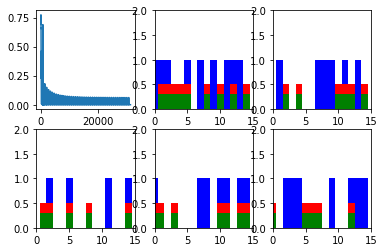

('New data, epoch', 47)
('Step', 0, 'Loss', 0.061671734)


('Step', 100, 'Loss', 2.2013413e-05)


('Step', 200, 'Loss', 2.3068655e-05)


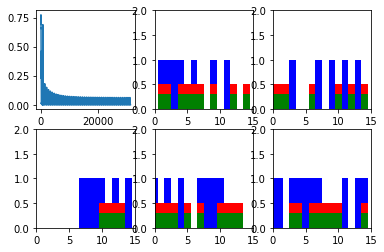

('Step', 300, 'Loss', 2.1185393e-05)


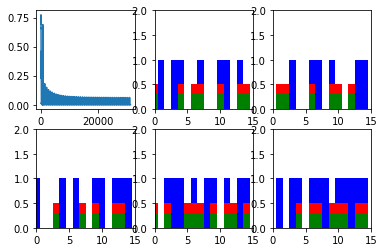

('Step', 400, 'Loss', 2.1657315e-05)


('Step', 500, 'Loss', 2.2002354e-05)


('Step', 600, 'Loss', 1.8656703e-05)


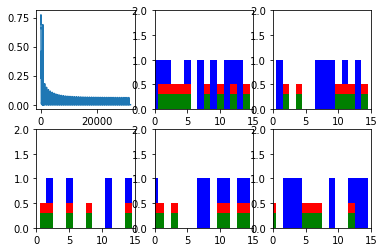

('New data, epoch', 48)
('Step', 0, 'Loss', 0.061601486)


('Step', 100, 'Loss', 2.1517528e-05)


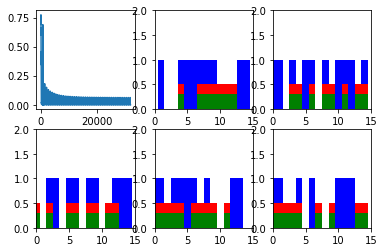

('Step', 200, 'Loss', 2.2602968e-05)


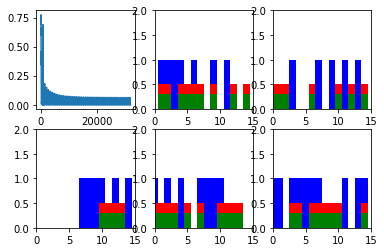

('Step', 300, 'Loss', 2.0727648e-05)


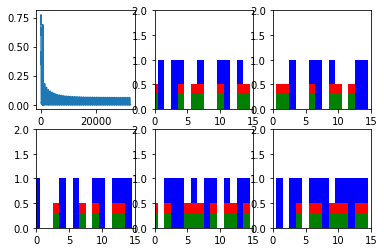

('Step', 400, 'Loss', 2.1304466e-05)


('Step', 500, 'Loss', 2.149693e-05)


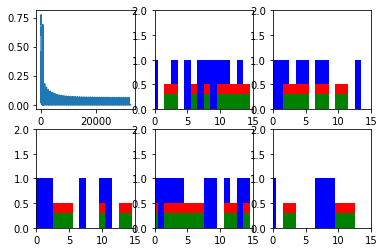

('Step', 600, 'Loss', 1.8233924e-05)


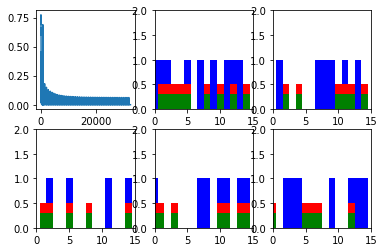

('New data, epoch', 49)
('Step', 0, 'Loss', 0.061534908)


('Step', 100, 'Loss', 2.1034359e-05)


('Step', 200, 'Loss', 2.2154769e-05)


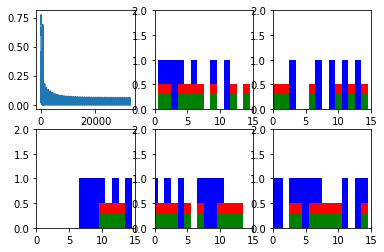

('Step', 300, 'Loss', 2.0295334e-05)


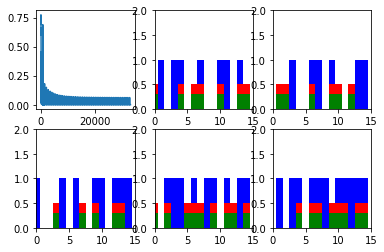

('Step', 400, 'Loss', 2.0975462e-05)


('Step', 500, 'Loss', 2.1039186e-05)


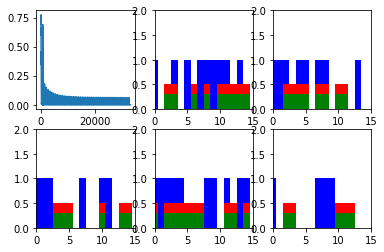

('Step', 600, 'Loss', 1.7828628e-05)


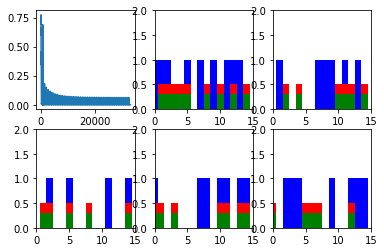

('New data, epoch', 50)
('Step', 0, 'Loss', 0.061471615)


('Step', 100, 'Loss', 2.056708e-05)


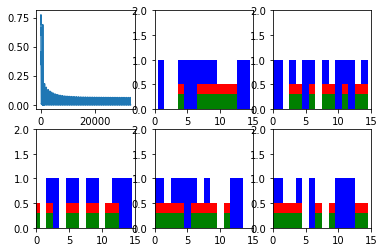

('Step', 200, 'Loss', 2.1724047e-05)


('Step', 300, 'Loss', 1.9867786e-05)


('Step', 400, 'Loss', 2.0660758e-05)


('Step', 500, 'Loss', 2.0579853e-05)


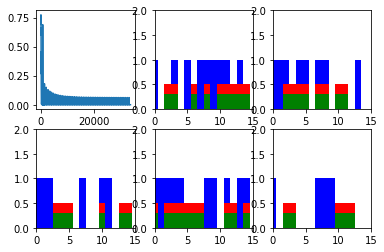

('Step', 600, 'Loss', 1.7442402e-05)


('New data, epoch', 51)
('Step', 0, 'Loss', 0.061411425)


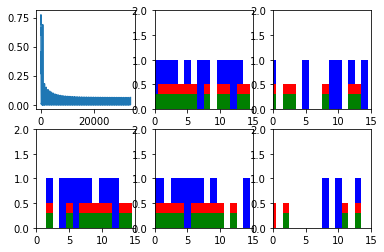

('Step', 100, 'Loss', 2.0129999e-05)


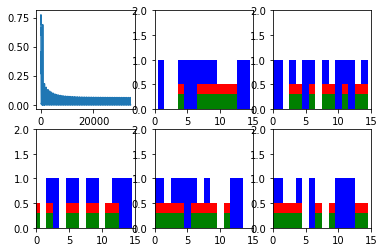

('Step', 200, 'Loss', 2.1313988e-05)


('Step', 300, 'Loss', 1.9462492e-05)


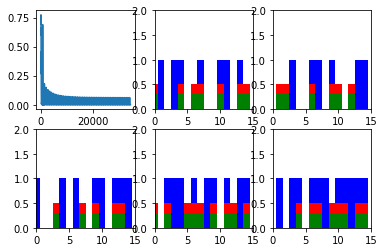

('Step', 400, 'Loss', 2.0357178e-05)


('Step', 500, 'Loss', 2.013959e-05)


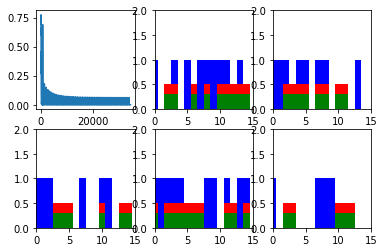

('Step', 600, 'Loss', 1.707843e-05)


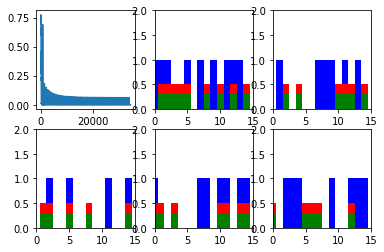

('New data, epoch', 52)
('Step', 0, 'Loss', 0.061354097)


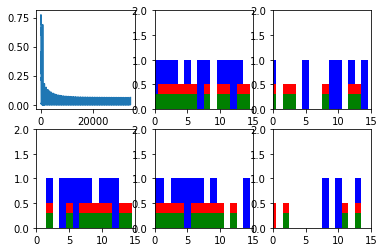

('Step', 100, 'Loss', 1.9710402e-05)


('Step', 200, 'Loss', 2.0919828e-05)


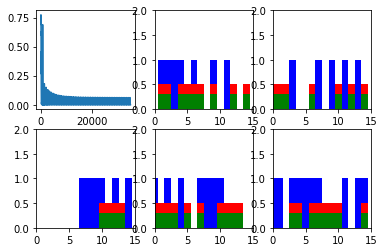

('Step', 300, 'Loss', 1.9068324e-05)


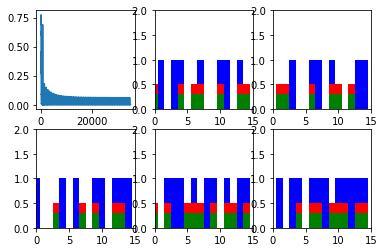

('Step', 400, 'Loss', 2.0063138e-05)


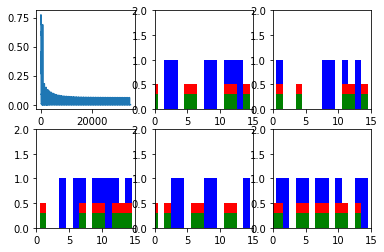

('Step', 500, 'Loss', 1.9729527e-05)


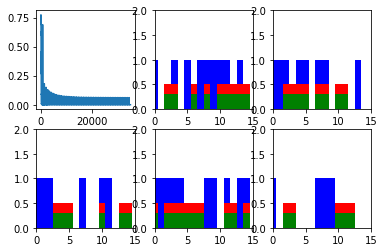

('Step', 600, 'Loss', 1.672876e-05)


('New data, epoch', 53)
('Step', 0, 'Loss', 0.06129944)


('Step', 100, 'Loss', 1.930352e-05)


('Step', 200, 'Loss', 2.0536787e-05)


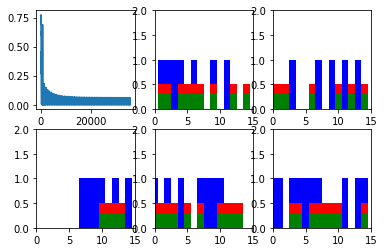

('Step', 300, 'Loss', 1.8691635e-05)


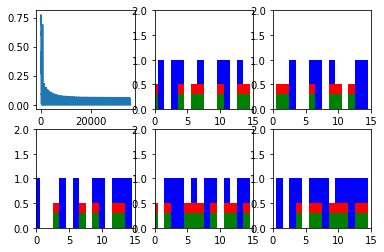

('Step', 400, 'Loss', 1.9791345e-05)


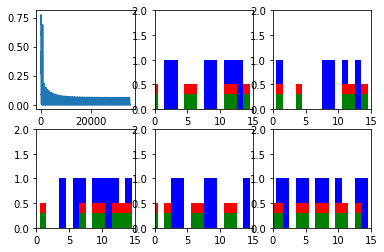

('Step', 500, 'Loss', 1.9322644e-05)


('Step', 600, 'Loss', 1.6390217e-05)


('New data, epoch', 54)
('Step', 0, 'Loss', 0.061247338)


('Step', 100, 'Loss', 1.8906174e-05)


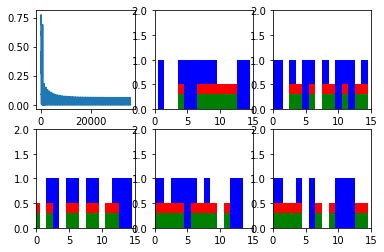

('Step', 200, 'Loss', 2.017282e-05)


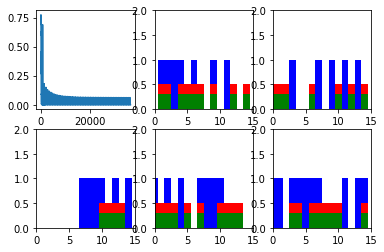

('Step', 300, 'Loss', 1.8326073e-05)


('Step', 400, 'Loss', 1.9524323e-05)


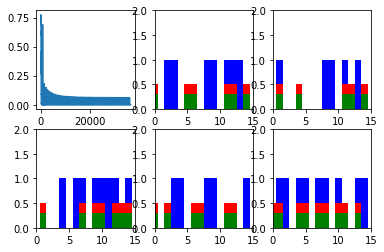

('Step', 500, 'Loss', 1.894119e-05)


('Step', 600, 'Loss', 1.6072336e-05)


('New data, epoch', 55)
('Step', 0, 'Loss', 0.061197486)


('Step', 100, 'Loss', 1.8529488e-05)


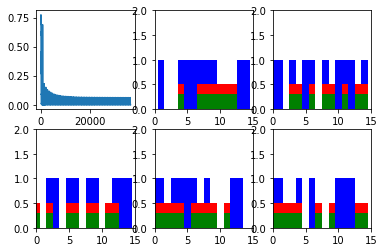

('Step', 200, 'Loss', 1.98168e-05)


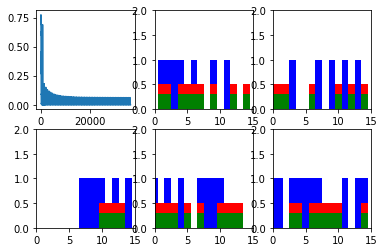

('Step', 300, 'Loss', 1.7974817e-05)


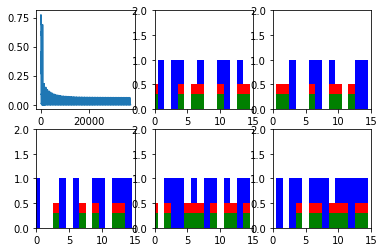

('Step', 400, 'Loss', 1.9268424e-05)


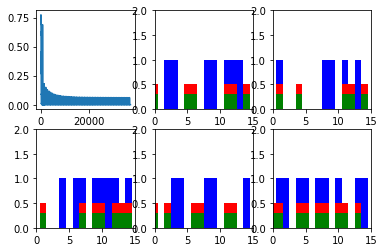

('Step', 500, 'Loss', 1.8561324e-05)


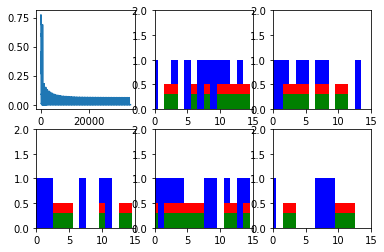

('Step', 600, 'Loss', 1.5757634e-05)


('New data, epoch', 56)
('Step', 0, 'Loss', 0.061149847)


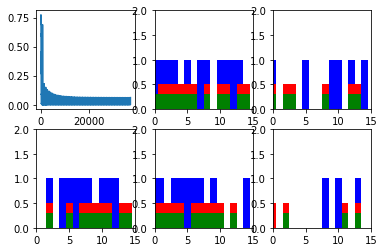

('Step', 100, 'Loss', 1.8178234e-05)


('Step', 200, 'Loss', 1.9487798e-05)


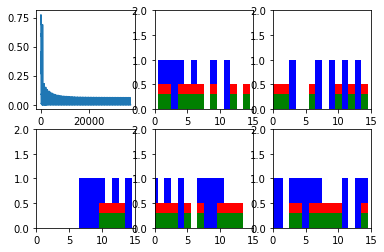

('Step', 300, 'Loss', 1.7644223e-05)


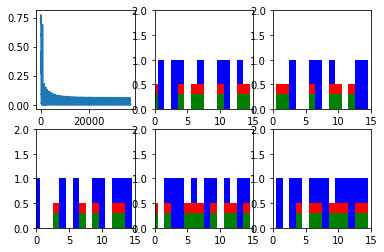

('Step', 400, 'Loss', 1.9034778e-05)


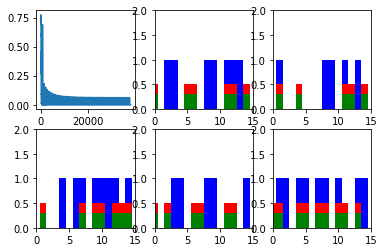

('Step', 500, 'Loss', 1.8206887e-05)


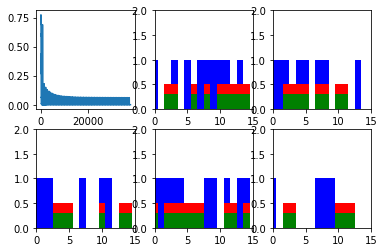

('Step', 600, 'Loss', 1.5462003e-05)


('New data, epoch', 57)
('Step', 0, 'Loss', 0.061104227)


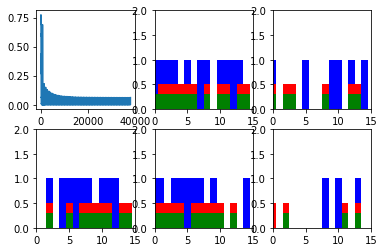

('Step', 100, 'Loss', 1.7826978e-05)


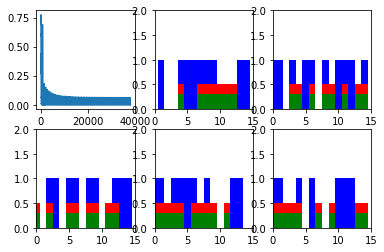

('Step', 200, 'Loss', 1.9149258e-05)


('Step', 300, 'Loss', 1.7327931e-05)


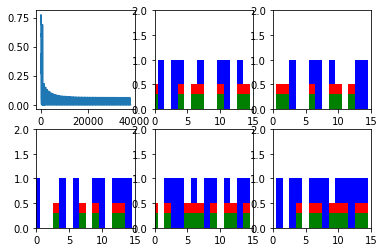

('Step', 400, 'Loss', 1.8799541e-05)


('Step', 500, 'Loss', 1.78604e-05)


('Step', 600, 'Loss', 1.5180677e-05)


('New data, epoch', 58)
('Step', 0, 'Loss', 0.061060525)


('Step', 100, 'Loss', 1.7494796e-05)


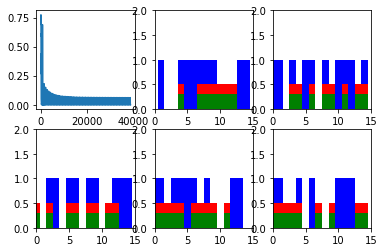

('Step', 200, 'Loss', 1.8839331e-05)


('Step', 300, 'Loss', 1.7014818e-05)


('Step', 400, 'Loss', 1.857861e-05)


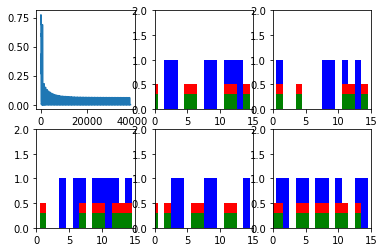

('Step', 500, 'Loss', 1.7532984e-05)


('Step', 600, 'Loss', 1.4908888e-05)


('New data, epoch', 59)
('Step', 0, 'Loss', 0.06101861)


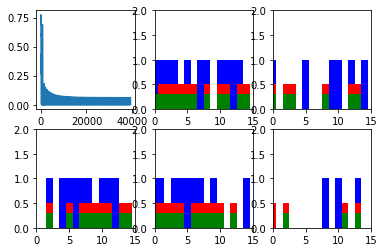

('Step', 100, 'Loss', 1.7161023e-05)


('Step', 200, 'Loss', 1.8537348e-05)


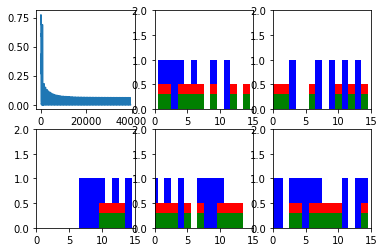

('Step', 300, 'Loss', 1.67176e-05)


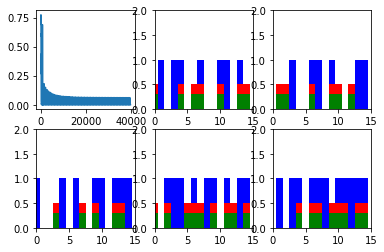

('Step', 400, 'Loss', 1.8352912e-05)


('Step', 500, 'Loss', 1.7202388e-05)


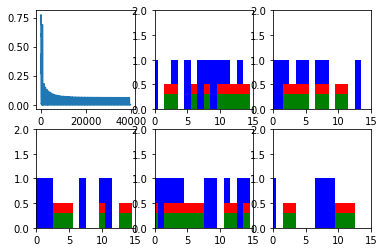

('Step', 600, 'Loss', 1.4652992e-05)


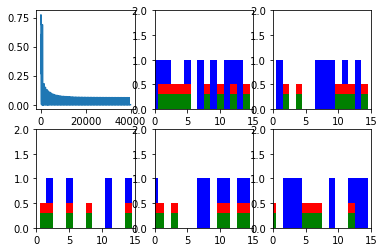

('New data, epoch', 60)
('Step', 0, 'Loss', 0.06097838)


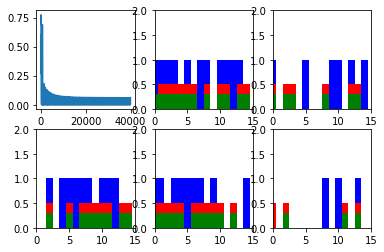

('Step', 100, 'Loss', 1.6860628e-05)


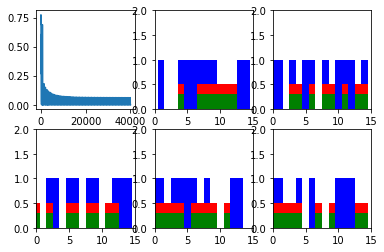

('Step', 200, 'Loss', 1.8240135e-05)


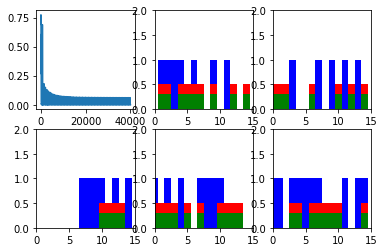

('Step', 300, 'Loss', 1.642515e-05)


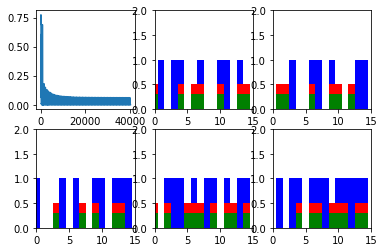

('Step', 400, 'Loss', 1.8149462e-05)


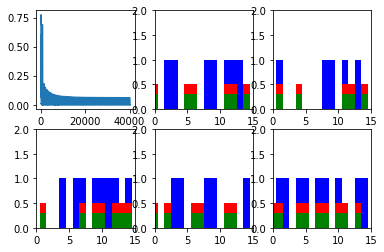

('Step', 500, 'Loss', 1.6890866e-05)


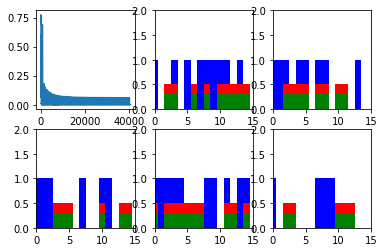

('Step', 600, 'Loss', 1.4392328e-05)


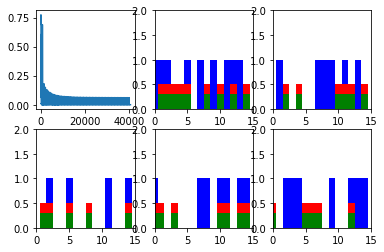

('New data, epoch', 61)
('Step', 0, 'Loss', 0.060939707)


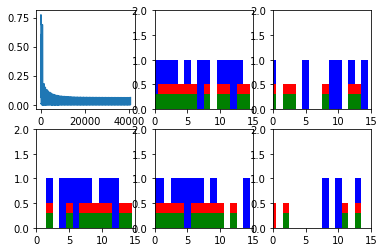

('Step', 100, 'Loss', 1.6552285e-05)


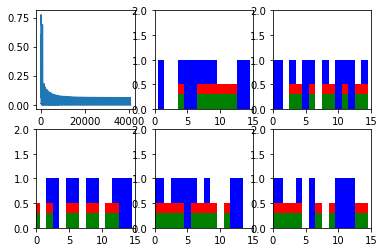

('Step', 200, 'Loss', 1.7958813e-05)


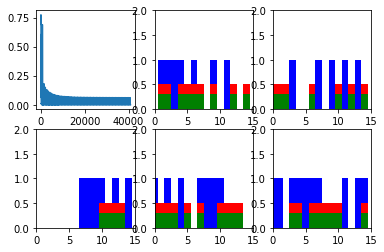

('Step', 300, 'Loss', 1.6148595e-05)


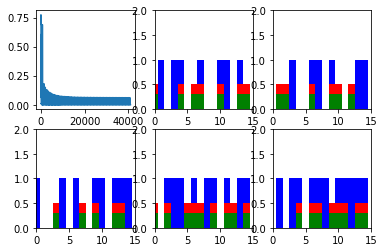

('Step', 400, 'Loss', 1.7952372e-05)


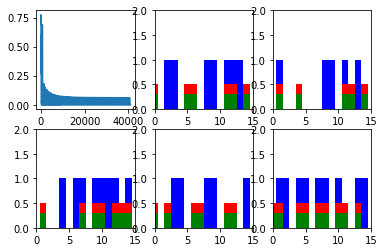

('Step', 500, 'Loss', 1.6596827e-05)


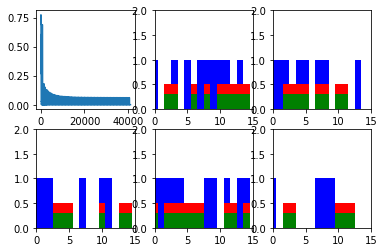

('Step', 600, 'Loss', 1.4147558e-05)


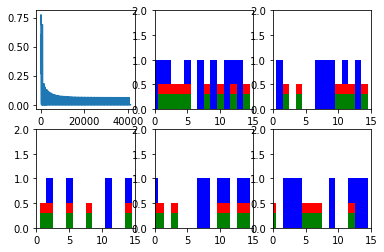

('New data, epoch', 62)
('Step', 0, 'Loss', 0.06090252)


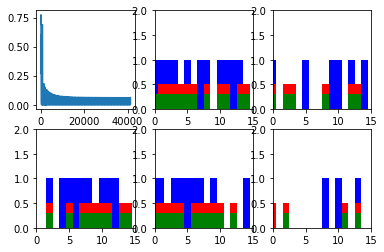

('Step', 100, 'Loss', 1.6261425e-05)


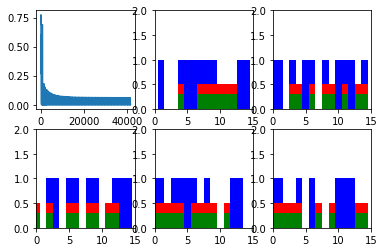

('Step', 200, 'Loss', 1.767908e-05)


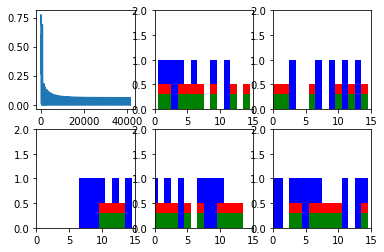

('Step', 300, 'Loss', 1.5873627e-05)


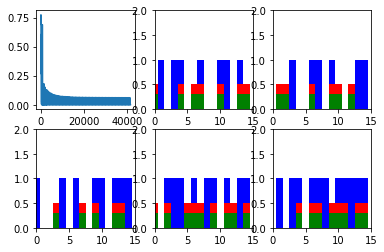

('Step', 400, 'Loss', 1.776005e-05)


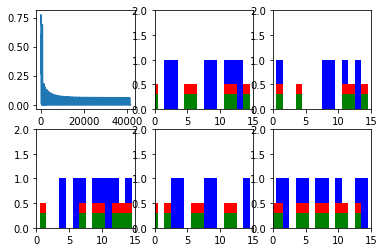

('Step', 500, 'Loss', 1.6298018e-05)


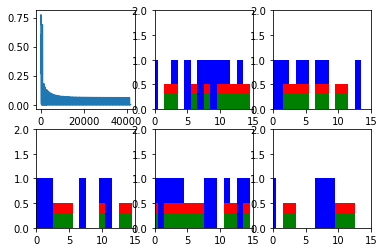

('Step', 600, 'Loss', 1.3918684e-05)


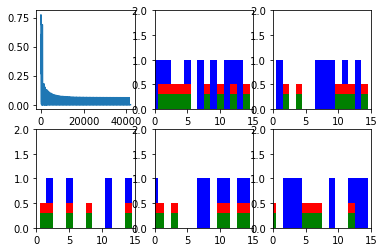

('New data, epoch', 63)
('Step', 0, 'Loss', 0.06086677)


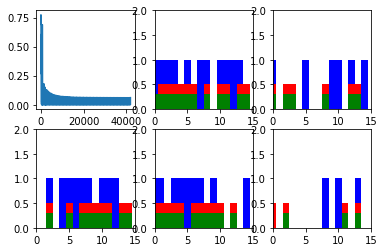

('Step', 100, 'Loss', 1.5989639e-05)


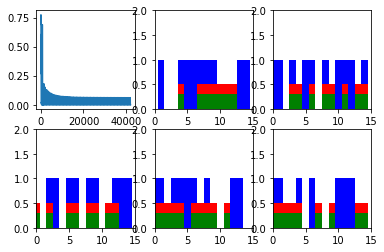

('Step', 200, 'Loss', 1.7424778e-05)


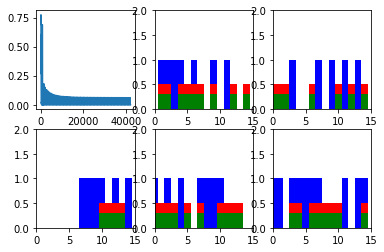

('Step', 300, 'Loss', 1.5616146e-05)


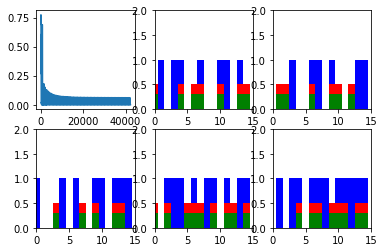

('Step', 400, 'Loss', 1.7569317e-05)


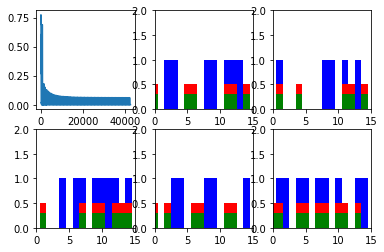

('Step', 500, 'Loss', 1.6016693e-05)


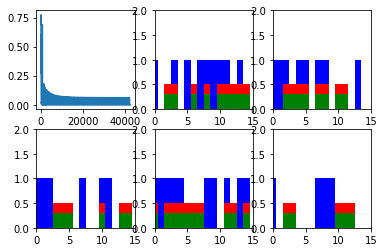

('Step', 600, 'Loss', 1.36850385e-05)


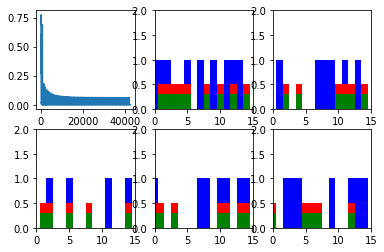

('New data, epoch', 64)
('Step', 0, 'Loss', 0.060832303)


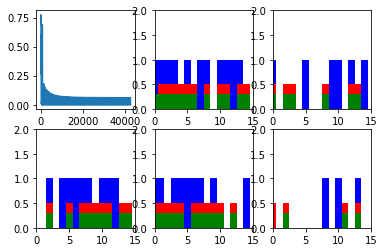

('Step', 100, 'Loss', 1.5706728e-05)


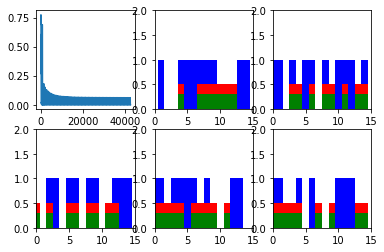

('Step', 200, 'Loss', 1.716094e-05)


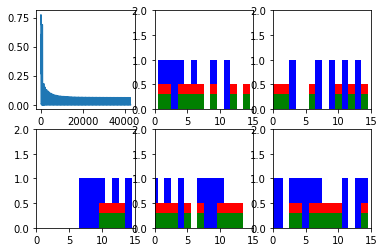

('Step', 300, 'Loss', 1.5366608e-05)


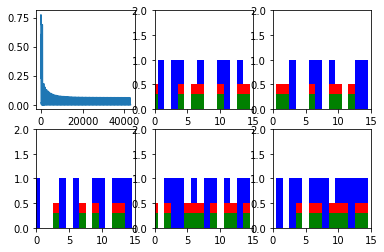

('Step', 400, 'Loss', 1.737858e-05)


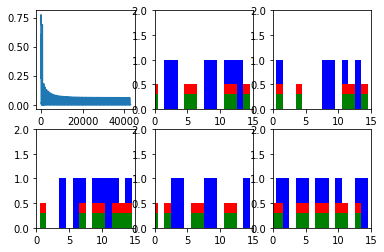

('Step', 500, 'Loss', 1.5746497e-05)


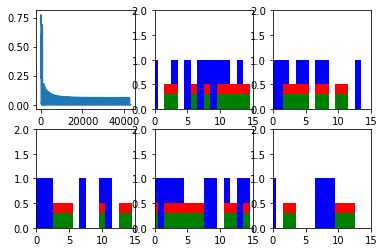

('Step', 600, 'Loss', 1.3462521e-05)


('New data, epoch', 65)
('Step', 0, 'Loss', 0.060799096)


('Step', 100, 'Loss', 1.5447653e-05)


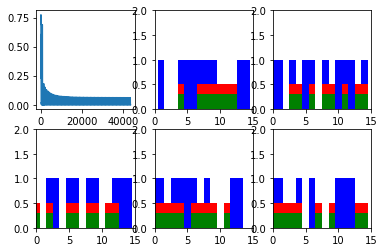

('Step', 200, 'Loss', 1.6919354e-05)


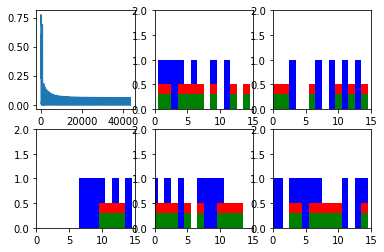

('Step', 300, 'Loss', 1.511707e-05)


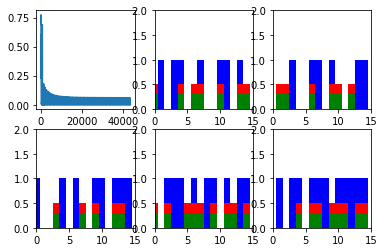

('Step', 400, 'Loss', 1.7205333e-05)


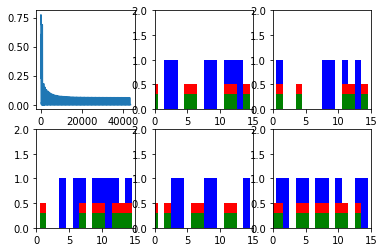

('Step', 500, 'Loss', 1.5482654e-05)


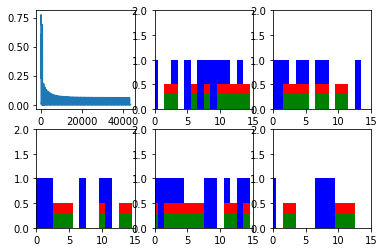

('Step', 600, 'Loss', 1.3251128e-05)


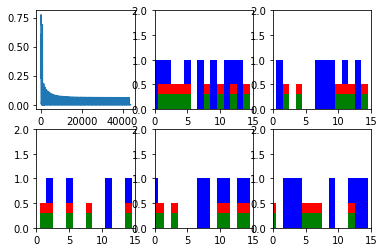

('New data, epoch', 66)
('Step', 0, 'Loss', 0.060767077)


('Step', 100, 'Loss', 1.51981185e-05)


('Step', 200, 'Loss', 1.6674587e-05)


('Step', 300, 'Loss', 1.4889787e-05)


('Step', 400, 'Loss', 1.7032082e-05)


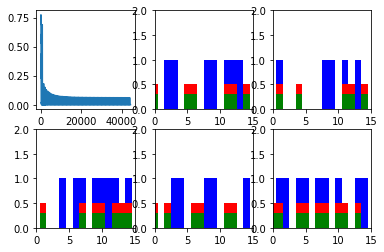

('Step', 500, 'Loss', 1.5226761e-05)


('Step', 600, 'Loss', 1.3046092e-05)


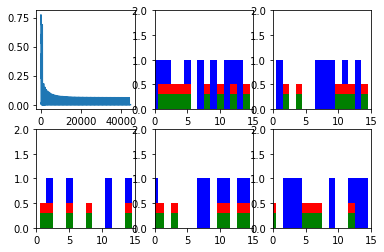

('New data, epoch', 67)
('Step', 0, 'Loss', 0.06073617)


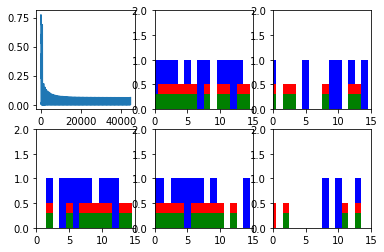

('Step', 100, 'Loss', 1.4940634e-05)


('Step', 200, 'Loss', 1.6437769e-05)


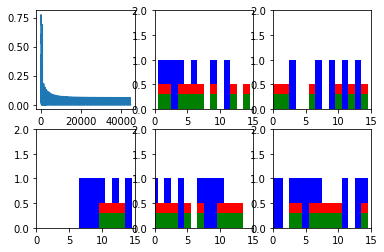

('Step', 300, 'Loss', 1.4654554e-05)


('Step', 400, 'Loss', 1.6869955e-05)


('Step', 500, 'Loss', 1.4978813e-05)


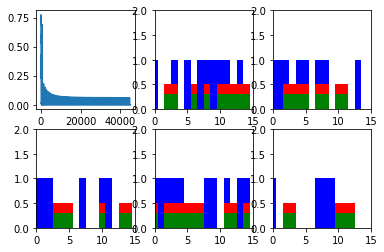

('Step', 600, 'Loss', 1.2842648e-05)


('New data, epoch', 68)
('Step', 0, 'Loss', 0.06070631)


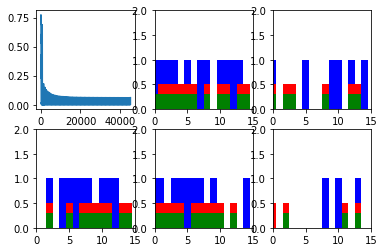

('Step', 100, 'Loss', 1.4711762e-05)


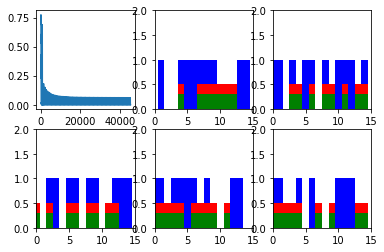

('Step', 200, 'Loss', 1.6210486e-05)


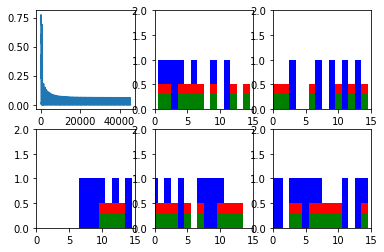

('Step', 300, 'Loss', 1.4436804e-05)


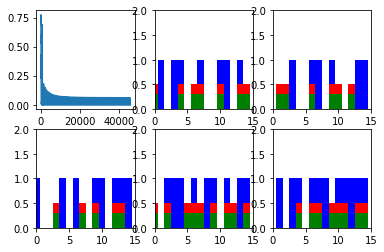

('Step', 400, 'Loss', 1.6714188e-05)


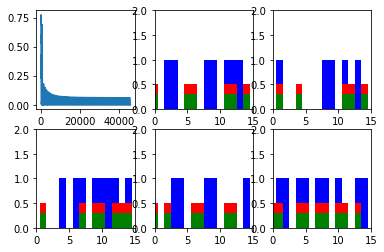

('Step', 500, 'Loss', 1.4741992e-05)


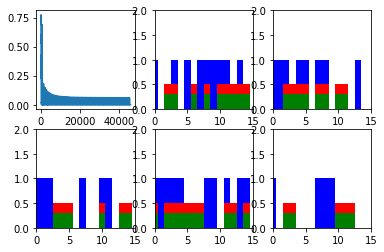

('Step', 600, 'Loss', 1.2656685e-05)


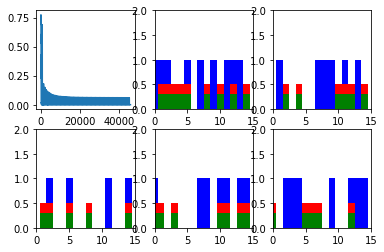

('New data, epoch', 69)
('Step', 0, 'Loss', 0.06067744)


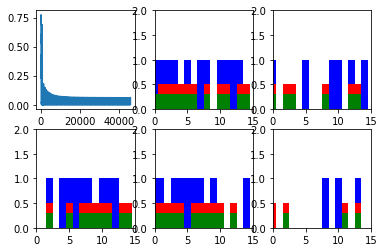

('Step', 100, 'Loss', 1.447335e-05)


('Step', 200, 'Loss', 1.598956e-05)


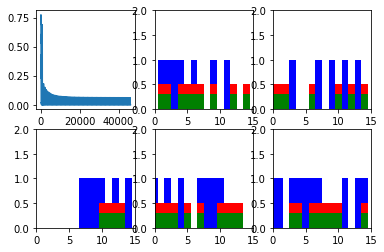

('Step', 300, 'Loss', 1.4219056e-05)


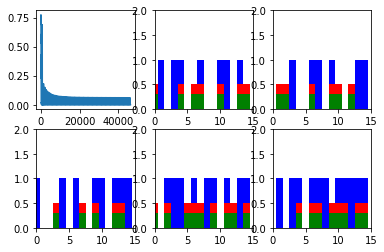

('Step', 400, 'Loss', 1.6547296e-05)


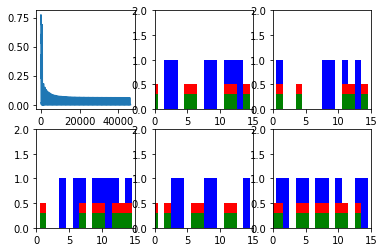

('Step', 500, 'Loss', 1.4505169e-05)


('Step', 600, 'Loss', 1.24770795e-05)


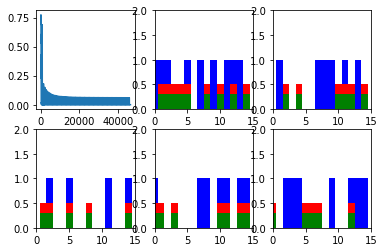

('New data, epoch', 70)
('Step', 0, 'Loss', 0.060649514)


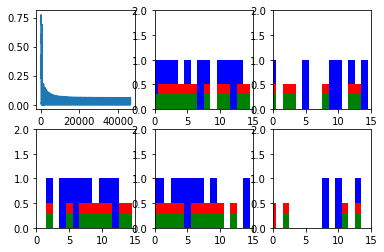

('Step', 100, 'Loss', 1.4244476e-05)


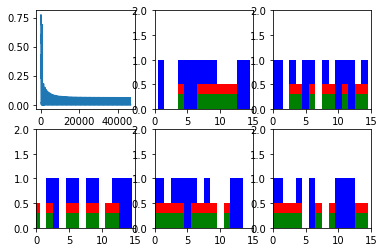

('Step', 200, 'Loss', 1.578453e-05)


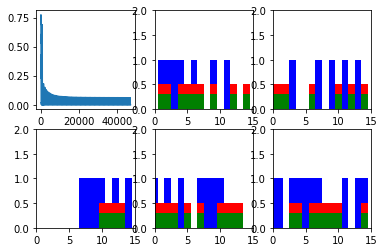

('Step', 300, 'Loss', 1.4009253e-05)


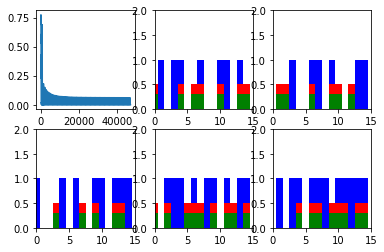

('Step', 400, 'Loss', 1.6394708e-05)


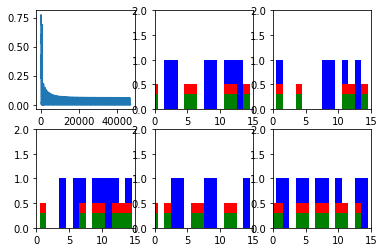

('Step', 500, 'Loss', 1.4273116e-05)


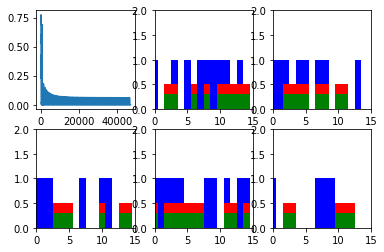

('Step', 600, 'Loss', 1.2297476e-05)


('New data, epoch', 71)
('Step', 0, 'Loss', 0.060622513)


('Step', 100, 'Loss', 1.4031495e-05)


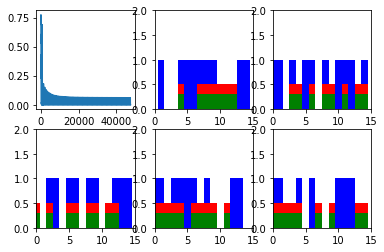

('Step', 200, 'Loss', 1.5568372e-05)


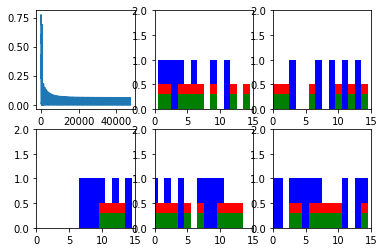

('Step', 300, 'Loss', 1.3812166e-05)


('Step', 400, 'Loss', 1.624689e-05)


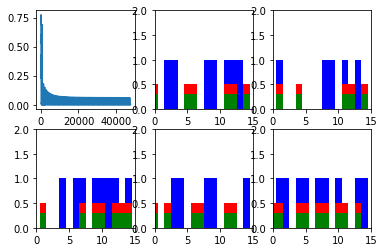

('Step', 500, 'Loss', 1.4061723e-05)


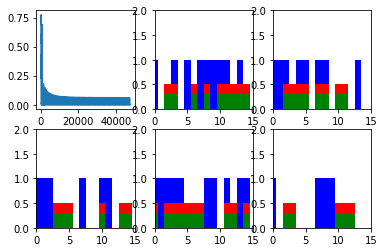

('Step', 600, 'Loss', 1.21115145e-05)


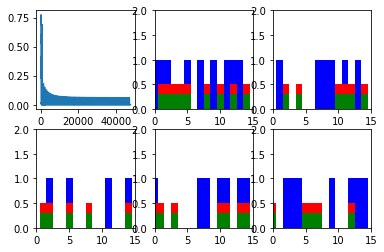

('New data, epoch', 72)
('Step', 0, 'Loss', 0.060596358)


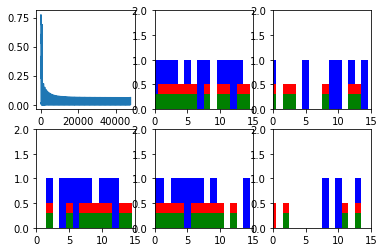

('Step', 100, 'Loss', 1.3824873e-05)


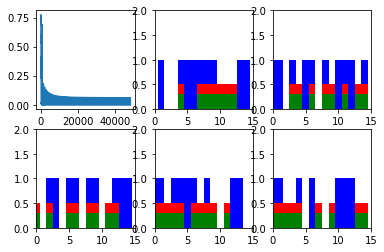

('Step', 200, 'Loss', 1.5371288e-05)


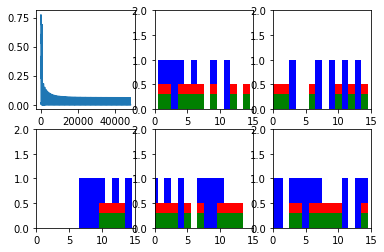

('Step', 300, 'Loss', 1.3611901e-05)


('Step', 400, 'Loss', 1.610066e-05)


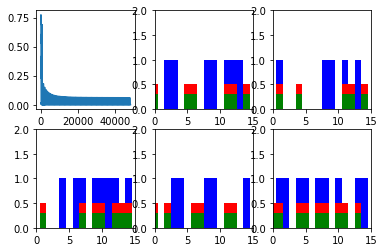

('Step', 500, 'Loss', 1.3840798e-05)


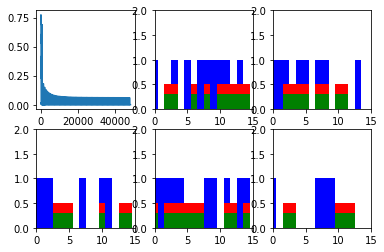

('Step', 600, 'Loss', 1.1947803e-05)


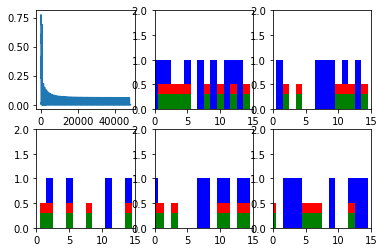

('New data, epoch', 73)
('Step', 0, 'Loss', 0.060570985)


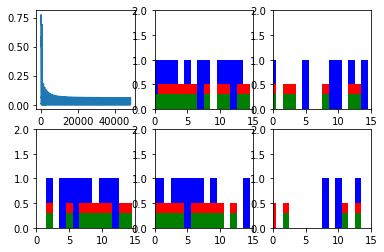

('Step', 100, 'Loss', 1.3616663e-05)


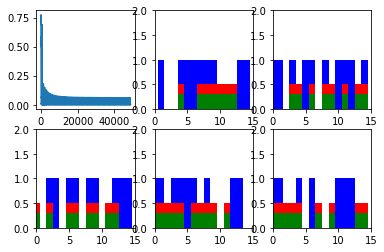

('Step', 200, 'Loss', 1.5174203e-05)


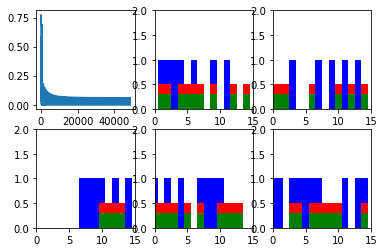

('Step', 300, 'Loss', 1.3424351e-05)


('Step', 400, 'Loss', 1.5963966e-05)


('Step', 500, 'Loss', 1.3637352e-05)


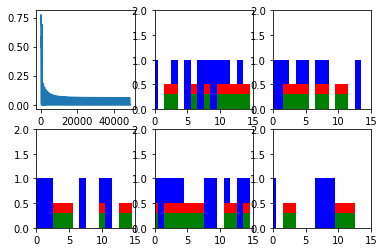

('Step', 600, 'Loss', 1.1780914e-05)


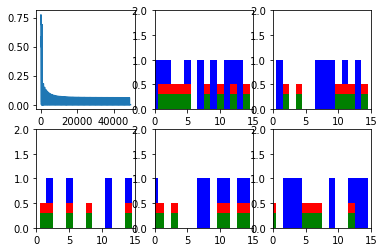

('New data, epoch', 74)
('Step', 0, 'Loss', 0.060546387)


('Step', 100, 'Loss', 1.3413218e-05)


('Step', 200, 'Loss', 1.4986654e-05)


('Step', 300, 'Loss', 1.3232031e-05)


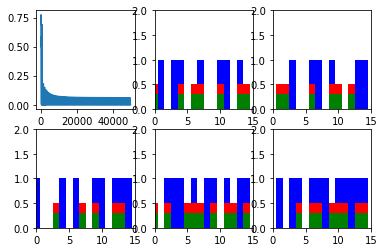

('Step', 400, 'Loss', 1.5817735e-05)


('Step', 500, 'Loss', 1.3437085e-05)


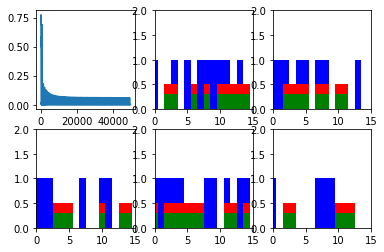

('Step', 600, 'Loss', 1.16330975e-05)


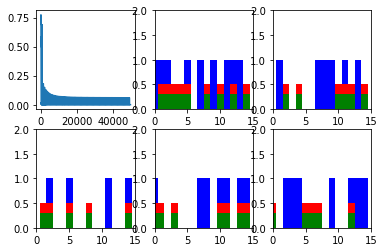

('New data, epoch', 75)
('Step', 0, 'Loss', 0.06052255)


('Step', 100, 'Loss', 1.3224079e-05)


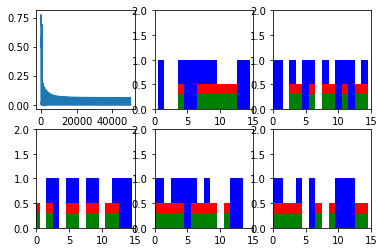

('Step', 200, 'Loss', 1.4802285e-05)


('Step', 300, 'Loss', 1.304766e-05)


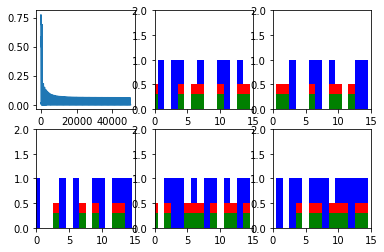

('Step', 400, 'Loss', 1.5690579e-05)


('Step', 500, 'Loss', 1.3243177e-05)


('Step', 600, 'Loss', 1.1472565e-05)


('New data, epoch', 76)
('Step', 0, 'Loss', 0.06049942)


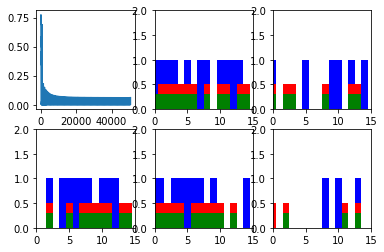

('Step', 100, 'Loss', 1.3031759e-05)


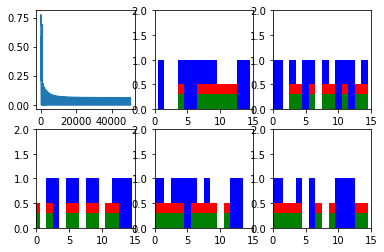

('Step', 200, 'Loss', 1.4624271e-05)


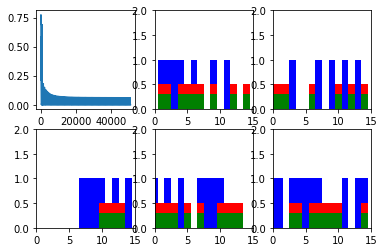

('Step', 300, 'Loss', 1.2880771e-05)


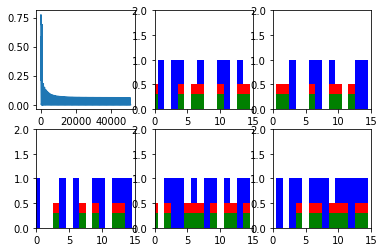

('Step', 400, 'Loss', 1.5557063e-05)


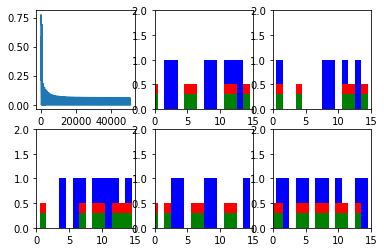

('Step', 500, 'Loss', 1.3052447e-05)


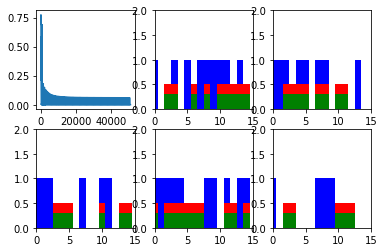

('Step', 600, 'Loss', 1.1316802e-05)


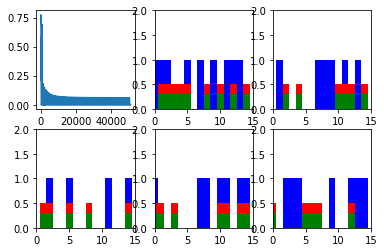

('New data, epoch', 77)
('Step', 0, 'Loss', 0.06047694)


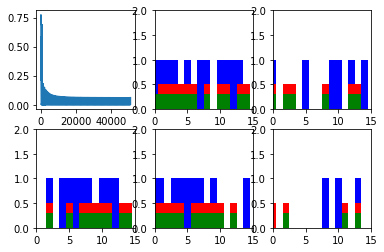

('Step', 100, 'Loss', 1.2845799e-05)


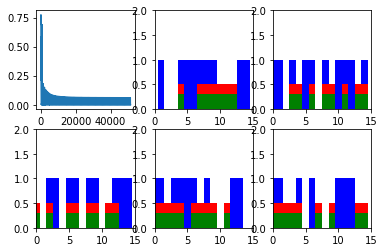

('Step', 200, 'Loss', 1.4438312e-05)


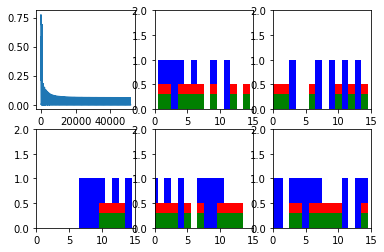

('Step', 300, 'Loss', 1.2713884e-05)


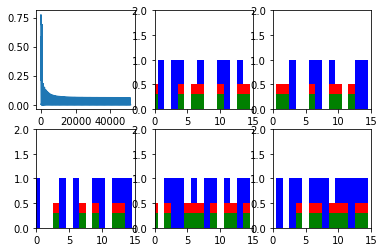

('Step', 400, 'Loss', 1.5428317e-05)


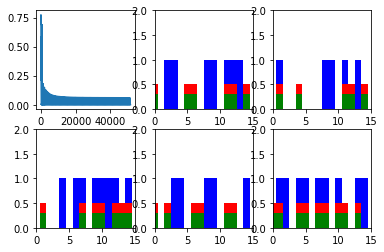

('Step', 500, 'Loss', 1.285695e-05)


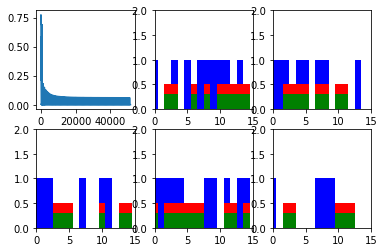

('Step', 600, 'Loss', 1.1172164e-05)


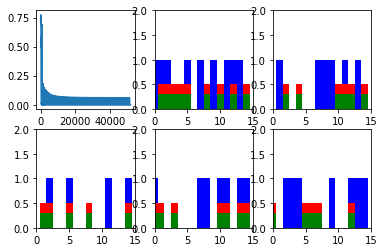

('New data, epoch', 78)
('Step', 0, 'Loss', 0.060455095)


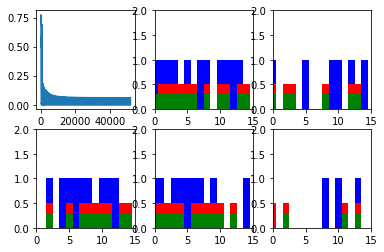

('Step', 100, 'Loss', 1.2672553e-05)


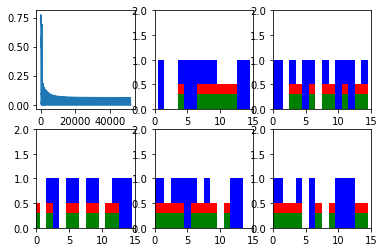

('Step', 200, 'Loss', 1.4276194e-05)


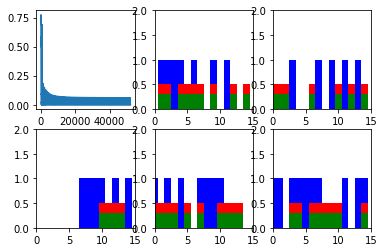

('Step', 300, 'Loss', 1.2537457e-05)


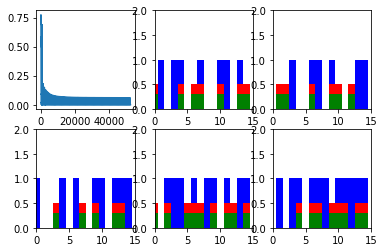

('Step', 400, 'Loss', 1.530116e-05)


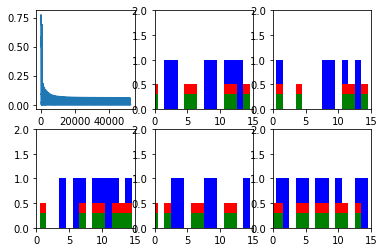

('Step', 500, 'Loss', 1.2680524e-05)


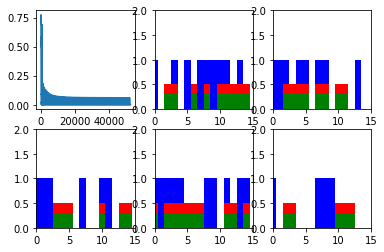

('Step', 600, 'Loss', 1.1030705e-05)


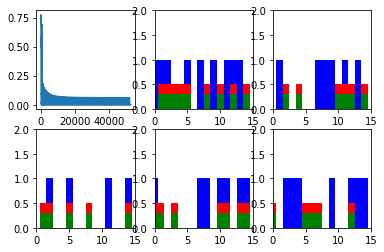

('New data, epoch', 79)
('Step', 0, 'Loss', 0.060433865)


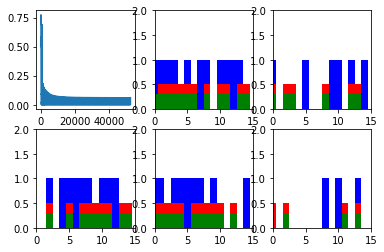

('Step', 100, 'Loss', 1.2492949e-05)


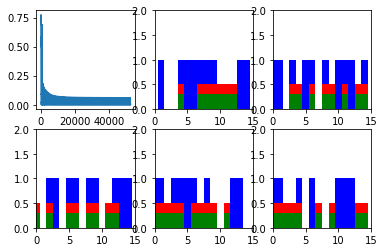

('Step', 200, 'Loss', 1.4114075e-05)


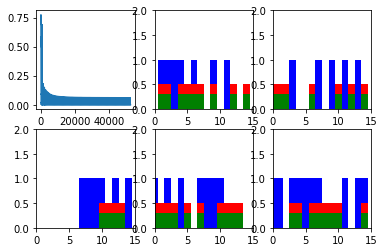

('Step', 300, 'Loss', 1.2384874e-05)


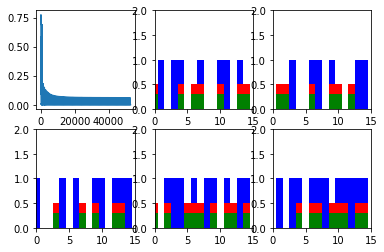

('Step', 400, 'Loss', 1.5167645e-05)


('Step', 500, 'Loss', 1.25056895e-05)


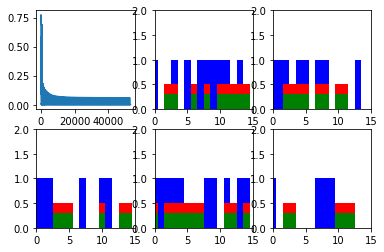

('Step', 600, 'Loss', 1.0892425e-05)


('New data, epoch', 80)
('Step', 0, 'Loss', 0.060413234)


('Step', 100, 'Loss', 1.2330829e-05)


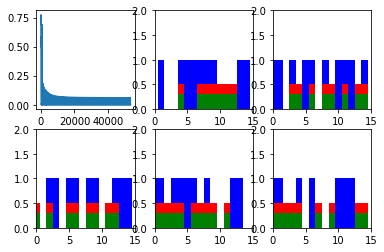

('Step', 200, 'Loss', 1.3948778e-05)


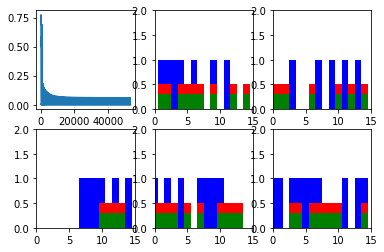

('Step', 300, 'Loss', 1.223229e-05)


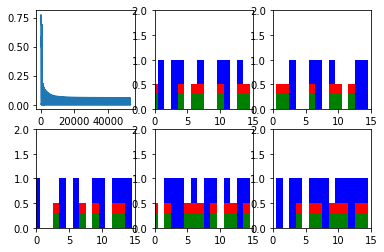

('Step', 400, 'Loss', 1.5054795e-05)


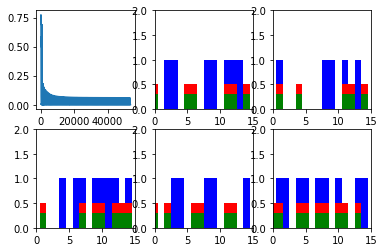

('Step', 500, 'Loss', 1.2337211e-05)


('Step', 600, 'Loss', 1.0758914e-05)


('New data, epoch', 81)
('Step', 0, 'Loss', 0.060393155)


('Step', 100, 'Loss', 1.2162352e-05)


('Step', 200, 'Loss', 1.378666e-05)


('Step', 300, 'Loss', 1.2076527e-05)


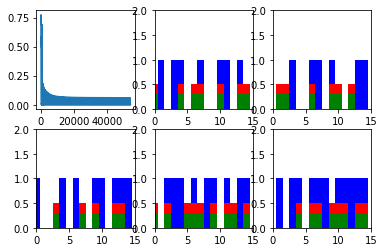

('Step', 400, 'Loss', 1.4935586e-05)


('Step', 500, 'Loss', 1.2167143e-05)


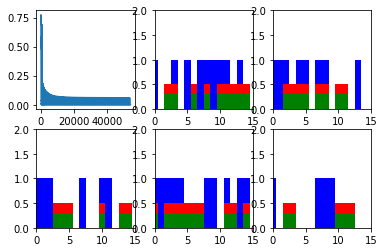

('Step', 600, 'Loss', 1.063017e-05)


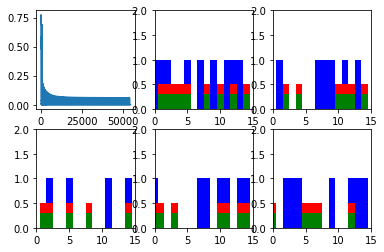

('New data, epoch', 82)
('Step', 0, 'Loss', 0.060373574)


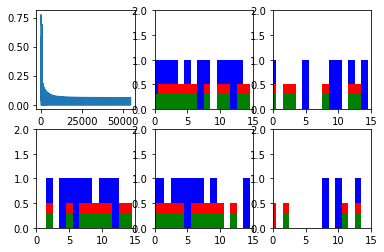

('Step', 100, 'Loss', 1.1998643e-05)


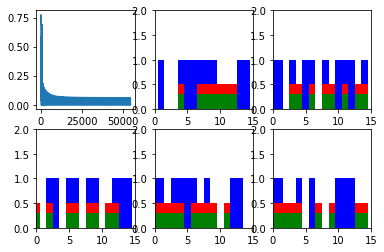

('Step', 200, 'Loss', 1.3630899e-05)


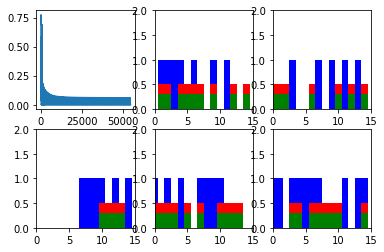

('Step', 300, 'Loss', 1.1920764e-05)


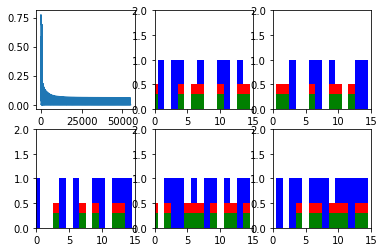

('Step', 400, 'Loss', 1.4821142e-05)


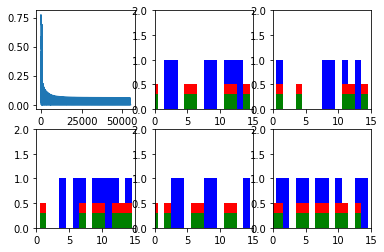

('Step', 500, 'Loss', 1.2003433e-05)


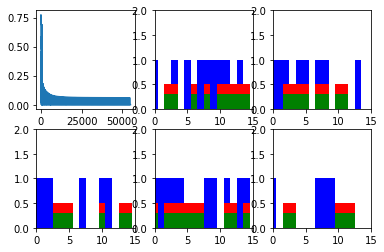

('Step', 600, 'Loss', 1.0498247e-05)


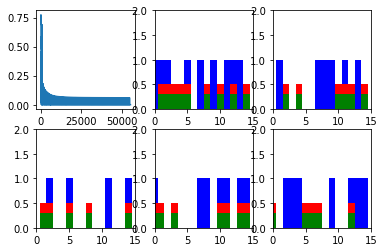

('New data, epoch', 83)
('Step', 0, 'Loss', 0.06035453)


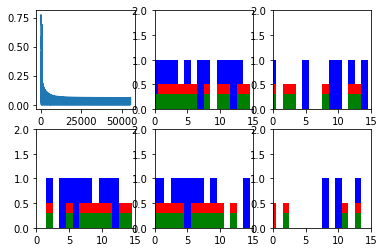

('Step', 100, 'Loss', 1.1842881e-05)


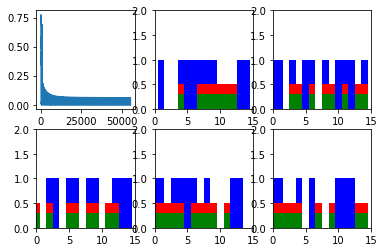

('Step', 200, 'Loss', 1.3484674e-05)


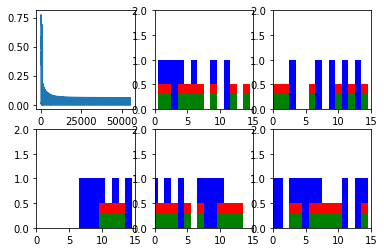

('Step', 300, 'Loss', 1.176818e-05)


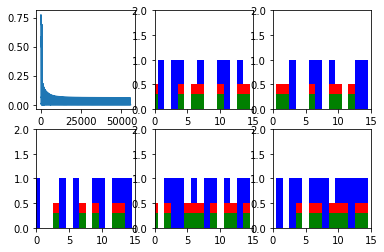

('Step', 400, 'Loss', 1.47035225e-05)


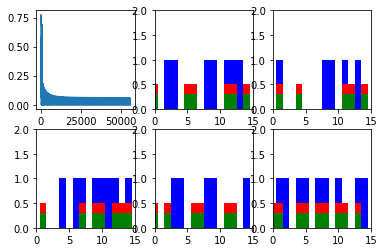

('Step', 500, 'Loss', 1.1844491e-05)


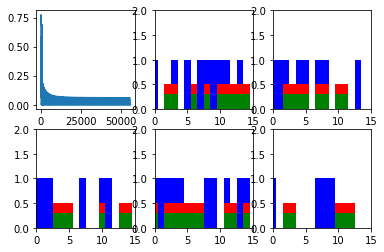

('Step', 600, 'Loss', 1.0374272e-05)


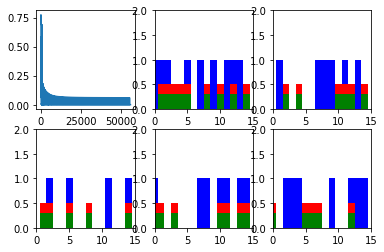

('New data, epoch', 84)
('Step', 0, 'Loss', 0.06033596)


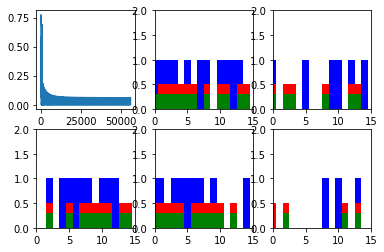

('Step', 100, 'Loss', 1.1695064e-05)


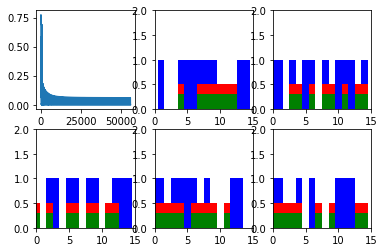

('Step', 200, 'Loss', 1.333527e-05)


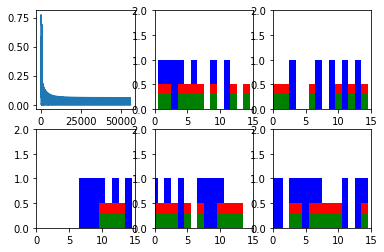

('Step', 300, 'Loss', 1.1626723e-05)


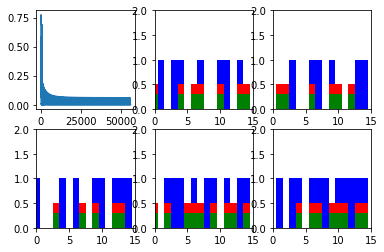

('Step', 400, 'Loss', 1.46017965e-05)


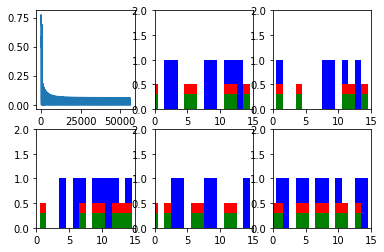

('Step', 500, 'Loss', 1.1687139e-05)


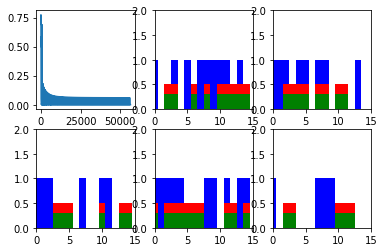

('Step', 600, 'Loss', 1.0247118e-05)


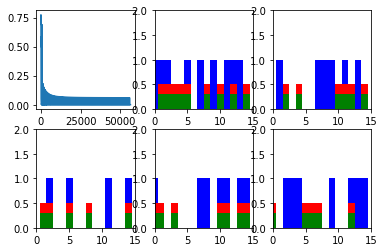

('New data, epoch', 85)
('Step', 0, 'Loss', 0.06031786)


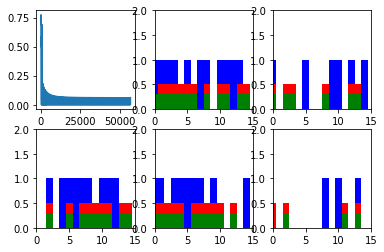

('Step', 100, 'Loss', 1.154566e-05)


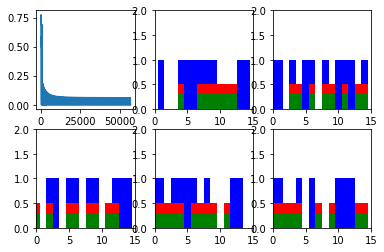

('Step', 200, 'Loss', 1.3192224e-05)


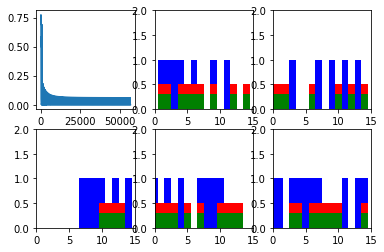

('Step', 300, 'Loss', 1.1499569e-05)


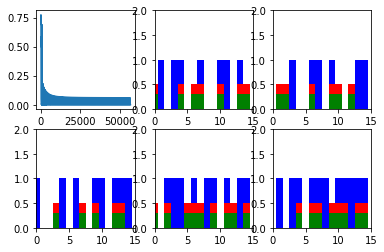

('Step', 400, 'Loss', 1.4492126e-05)


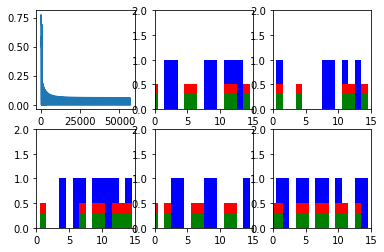

('Step', 500, 'Loss', 1.1539322e-05)


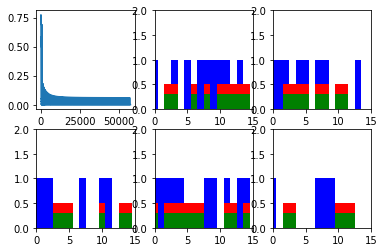

('Step', 600, 'Loss', 1.0134269e-05)


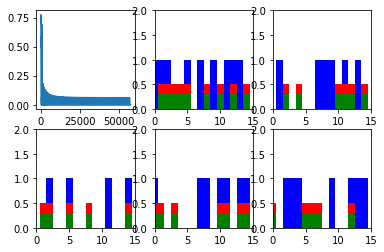

('New data, epoch', 86)
('Step', 0, 'Loss', 0.06030023)


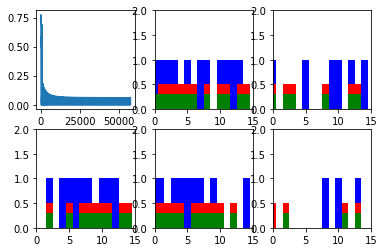

('Step', 100, 'Loss', 1.1394665e-05)


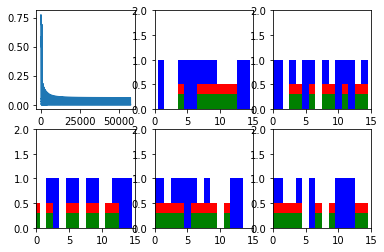

('Step', 200, 'Loss', 1.30539465e-05)


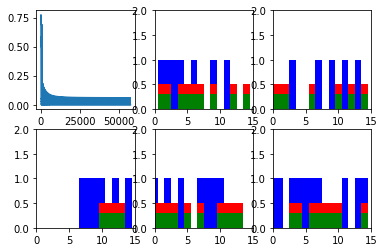

('Step', 300, 'Loss', 1.1364468e-05)


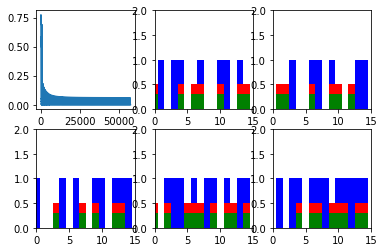

('Step', 400, 'Loss', 1.4379273e-05)


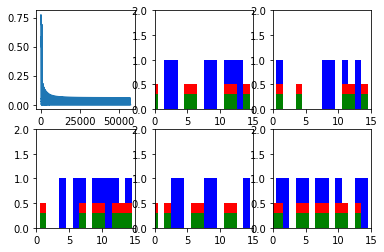

('Step', 500, 'Loss', 1.1397866e-05)


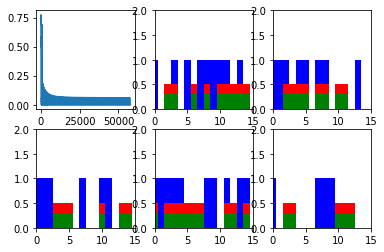

('Step', 600, 'Loss', 1.0018241e-05)


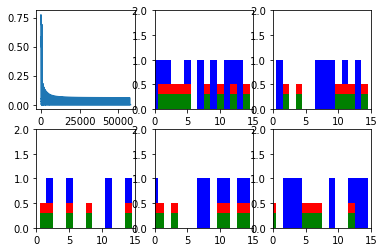

('New data, epoch', 87)
('Step', 0, 'Loss', 0.06028302)


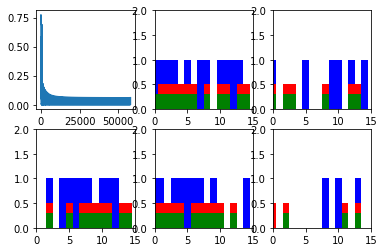

('Step', 100, 'Loss', 1.124685e-05)


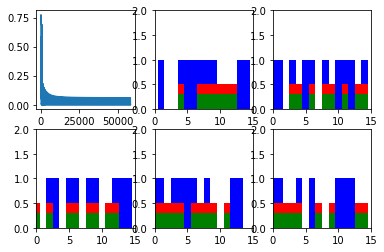

('Step', 200, 'Loss', 1.2914079e-05)


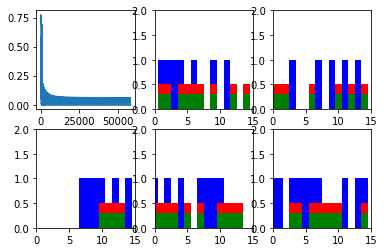

('Step', 300, 'Loss', 1.12373145e-05)


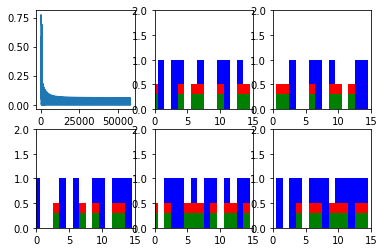

('Step', 400, 'Loss', 1.4275958e-05)


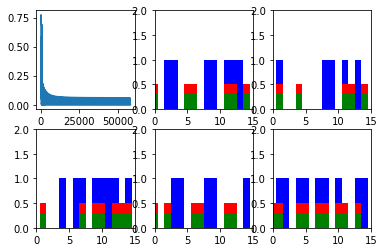

('Step', 500, 'Loss', 1.124528e-05)


('Step', 600, 'Loss', 9.906981e-06)


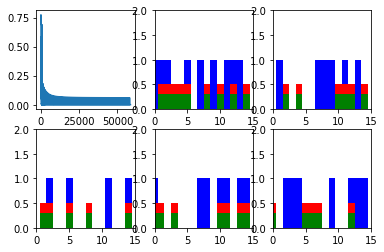

('New data, epoch', 88)
('Step', 0, 'Loss', 0.060266208)


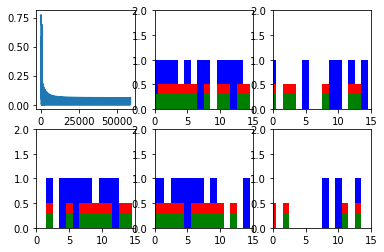

('Step', 100, 'Loss', 1.1116517e-05)


('Step', 200, 'Loss', 1.277739e-05)


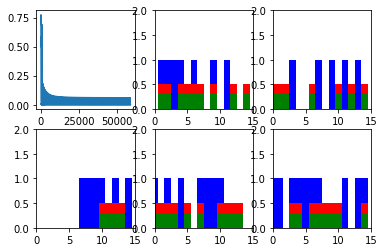

('Step', 300, 'Loss', 1.1103803e-05)


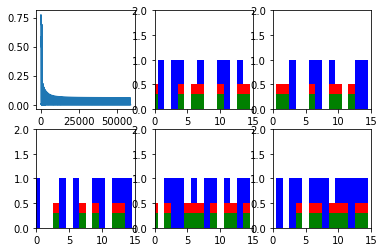

('Step', 400, 'Loss', 1.4175822e-05)


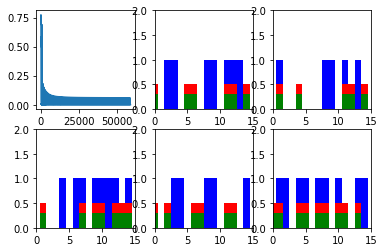

('Step', 500, 'Loss', 1.1103822e-05)


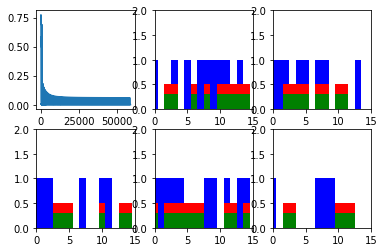

('Step', 600, 'Loss', 9.802078e-06)


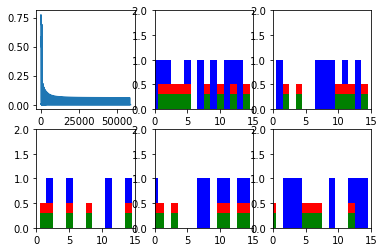

('New data, epoch', 89)
('Step', 0, 'Loss', 0.060249824)


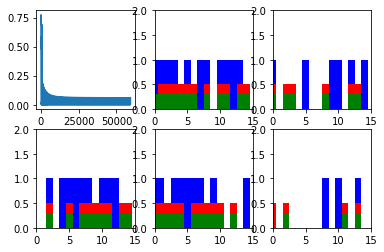

('Step', 100, 'Loss', 1.0984598e-05)


('Step', 200, 'Loss', 1.2653417e-05)


('Step', 300, 'Loss', 1.0973471e-05)


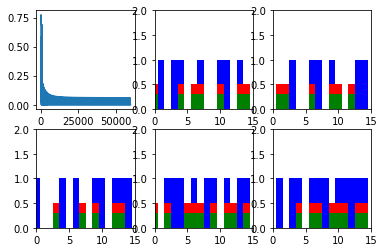

('Step', 400, 'Loss', 1.4078865e-05)


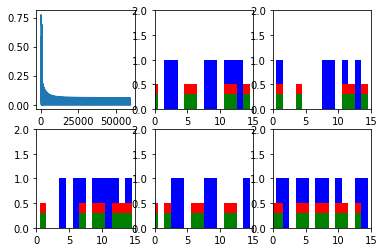

('Step', 500, 'Loss', 1.0976669e-05)


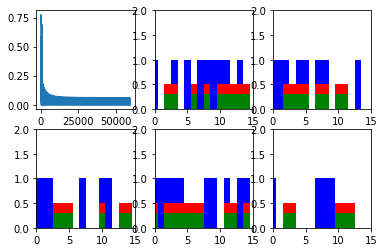

('Step', 600, 'Loss', 9.679692e-06)


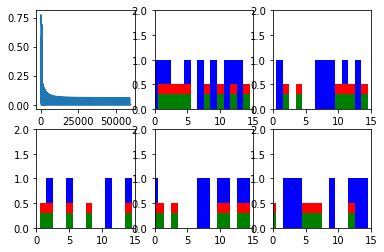

('New data, epoch', 90)
('Step', 0, 'Loss', 0.060233817)


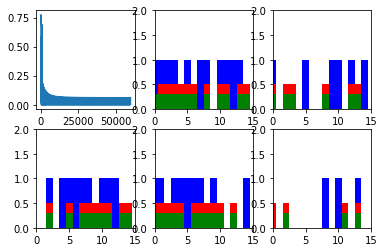

('Step', 100, 'Loss', 1.0847907e-05)


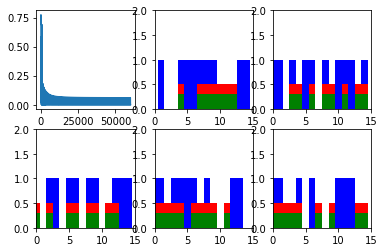

('Step', 200, 'Loss', 1.2518318e-05)


('Step', 300, 'Loss', 1.0857444e-05)


('Step', 400, 'Loss', 1.3969193e-05)


('Step', 500, 'Loss', 1.0835211e-05)


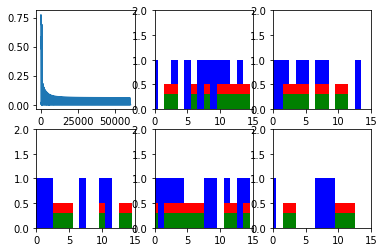

('Step', 600, 'Loss', 9.587506e-06)


('New data, epoch', 91)
('Step', 0, 'Loss', 0.060218155)


('Step', 100, 'Loss', 1.0720753e-05)


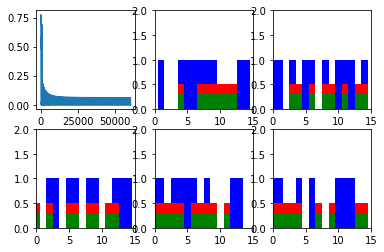

('Step', 200, 'Loss', 1.2399113e-05)


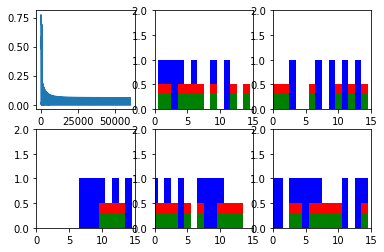

('Step', 300, 'Loss', 1.0725523e-05)


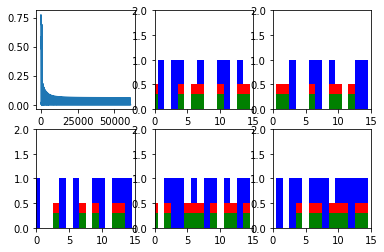

('Step', 400, 'Loss', 1.3881771e-05)


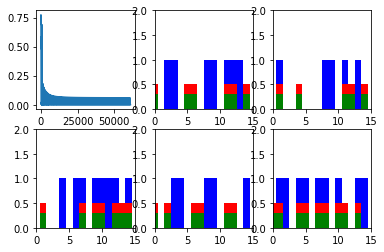

('Step', 500, 'Loss', 1.0701699e-05)


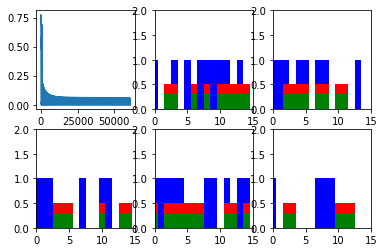

('Step', 600, 'Loss', 9.487371e-06)


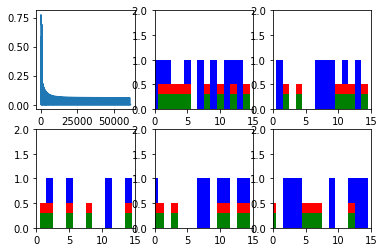

('New data, epoch', 92)
('Step', 0, 'Loss', 0.060202867)


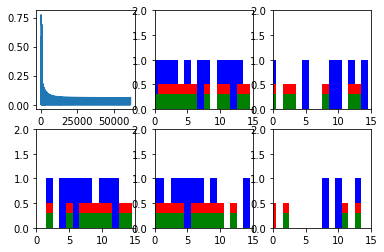

('Step', 100, 'Loss', 1.0599957e-05)


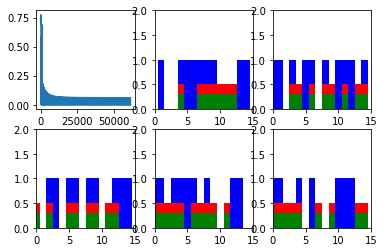

('Step', 200, 'Loss', 1.2276729e-05)


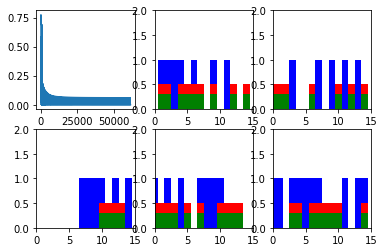

('Step', 300, 'Loss', 1.0611084e-05)


('Step', 400, 'Loss', 1.3781635e-05)


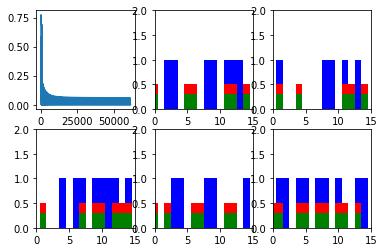

('Step', 500, 'Loss', 1.0576134e-05)


('Step', 600, 'Loss', 9.38088e-06)


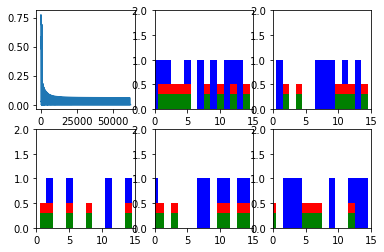

('New data, epoch', 93)
('Step', 0, 'Loss', 0.060187943)


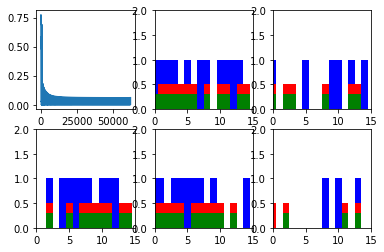

('Step', 100, 'Loss', 1.0468037e-05)


('Step', 200, 'Loss', 1.2160703e-05)


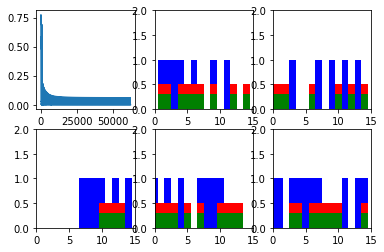

('Step', 300, 'Loss', 1.0499824e-05)


('Step', 400, 'Loss', 1.3695806e-05)


('Step', 500, 'Loss', 1.0455337e-05)


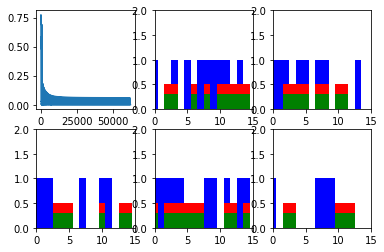

('Step', 600, 'Loss', 9.287104e-06)


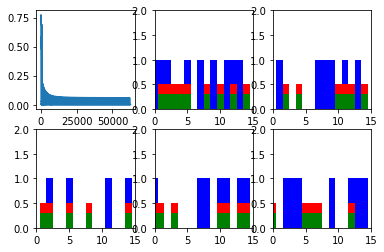

('New data, epoch', 94)
('Step', 0, 'Loss', 0.06017333)


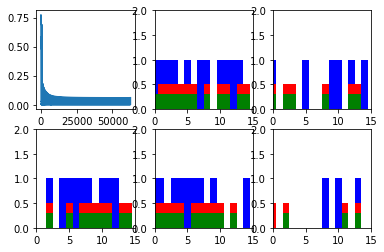

('Step', 100, 'Loss', 1.0353598e-05)


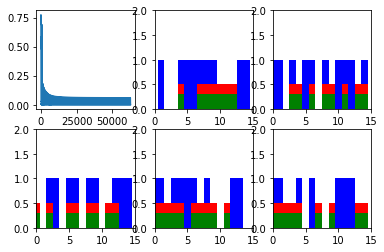

('Step', 200, 'Loss', 1.2038317e-05)


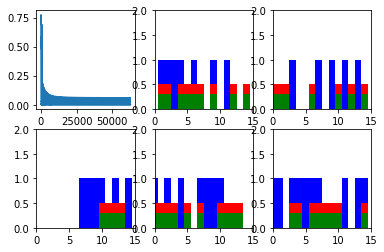

('Step', 300, 'Loss', 1.0383796e-05)


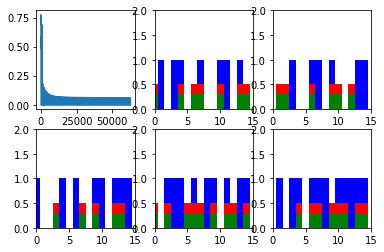

('Step', 400, 'Loss', 1.3592492e-05)


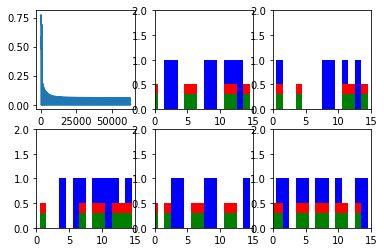

('Step', 500, 'Loss', 1.0331363e-05)


('Step', 600, 'Loss', 9.18379e-06)


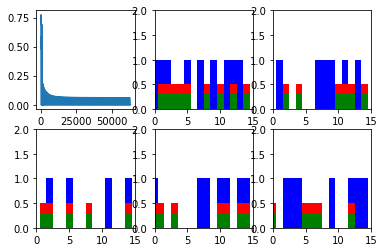

('New data, epoch', 95)
('Step', 0, 'Loss', 0.060159016)


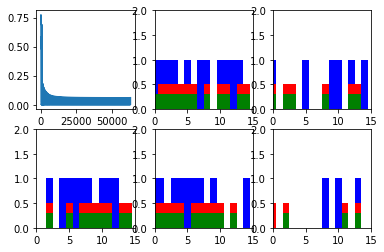

('Step', 100, 'Loss', 1.02296235e-05)


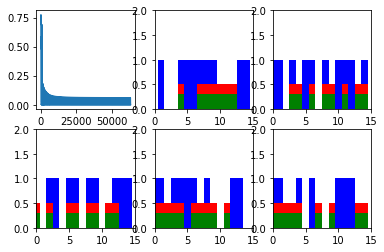

('Step', 200, 'Loss', 1.192547e-05)


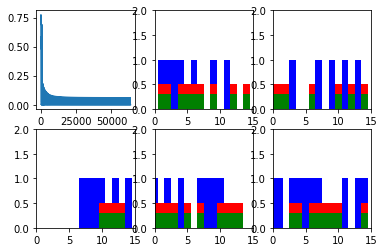

('Step', 300, 'Loss', 1.0269358e-05)


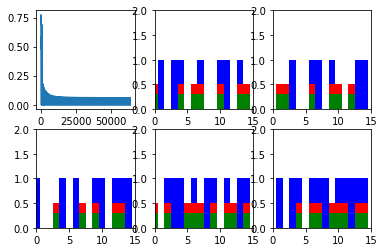

('Step', 400, 'Loss', 1.3500303e-05)


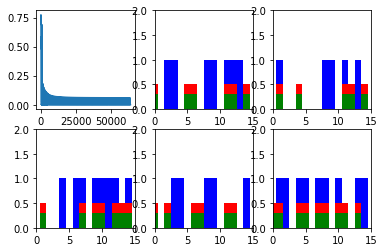

('Step', 500, 'Loss', 1.0208977e-05)


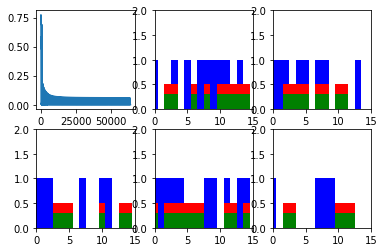

('Step', 600, 'Loss', 9.094783e-06)


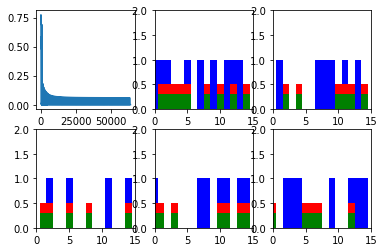

('New data, epoch', 96)
('Step', 0, 'Loss', 0.060145028)


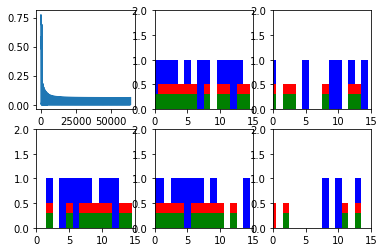

('Step', 100, 'Loss', 1.0123132e-05)


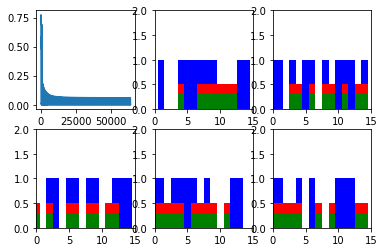

('Step', 200, 'Loss', 1.1814211e-05)


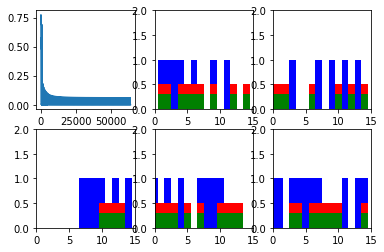

('Step', 300, 'Loss', 1.0164457e-05)


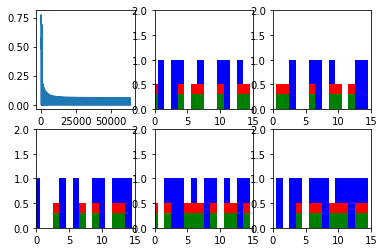

('Step', 400, 'Loss', 1.3409704e-05)


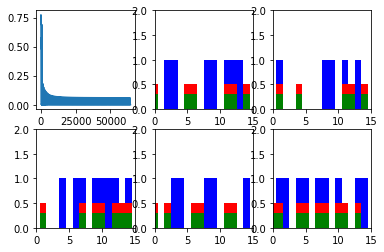

('Step', 500, 'Loss', 1.0097719e-05)


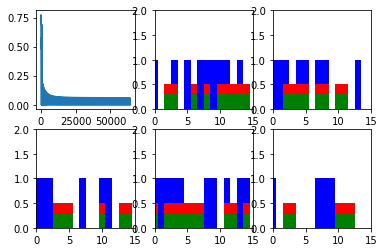

('Step', 600, 'Loss', 9.008953e-06)


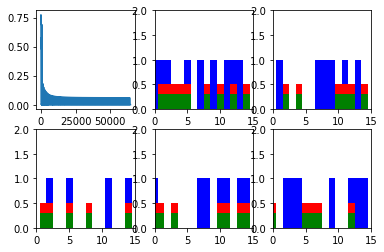

('New data, epoch', 97)
('Step', 0, 'Loss', 0.060131334)


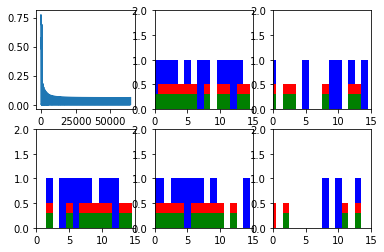

('Step', 100, 'Loss', 1.0007104e-05)


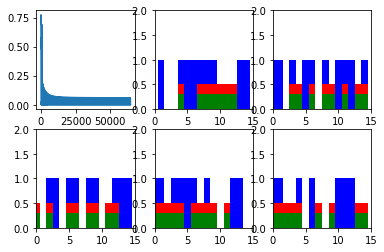

('Step', 200, 'Loss', 1.17109e-05)


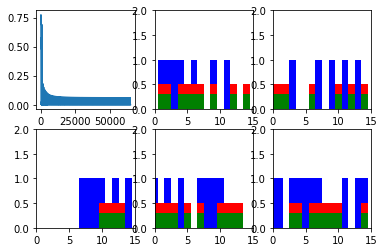

('Step', 300, 'Loss', 1.0064324e-05)


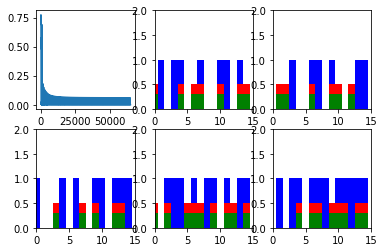

('Step', 400, 'Loss', 1.3323875e-05)


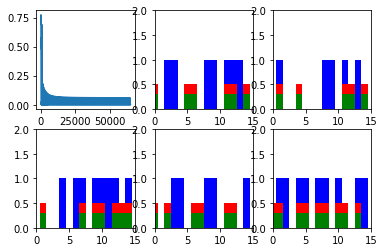

('Step', 500, 'Loss', 9.9848685e-06)


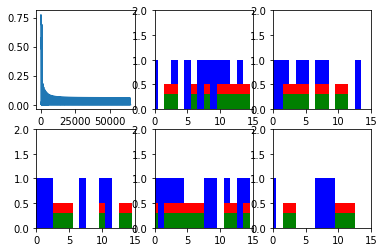

('Step', 600, 'Loss', 8.91041e-06)


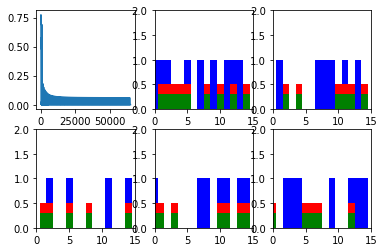

('New data, epoch', 98)
('Step', 0, 'Loss', 0.060117945)


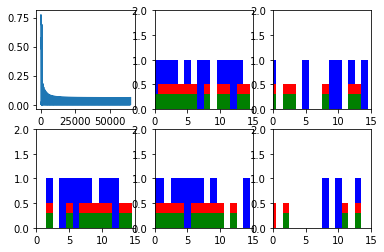

('Step', 100, 'Loss', 9.899023e-06)


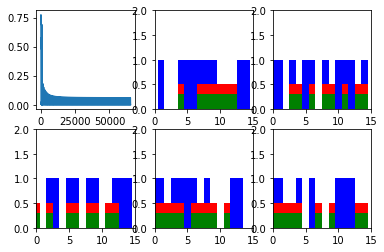

('Step', 200, 'Loss', 1.1607589e-05)


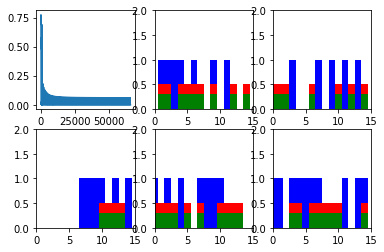

('Step', 300, 'Loss', 9.959421e-06)


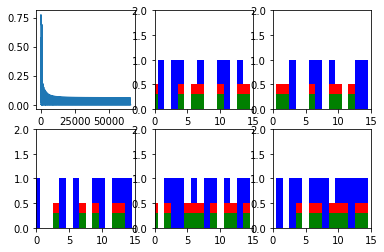

('Step', 400, 'Loss', 1.3233276e-05)


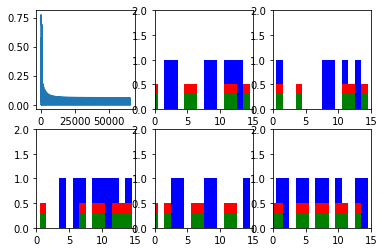

('Step', 500, 'Loss', 9.878377e-06)


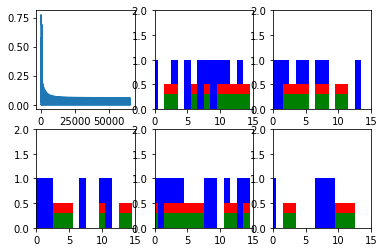

('Step', 600, 'Loss', 8.829348e-06)


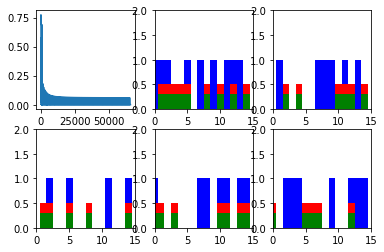

('New data, epoch', 99)
('Step', 0, 'Loss', 0.060104813)


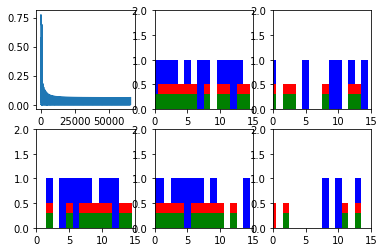

('Step', 100, 'Loss', 9.787764e-06)


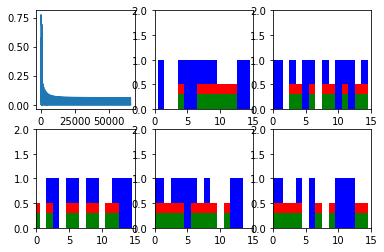

('Step', 200, 'Loss', 1.1494741e-05)


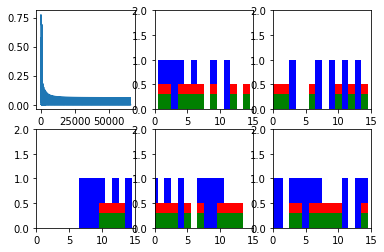

('Step', 300, 'Loss', 9.848162e-06)


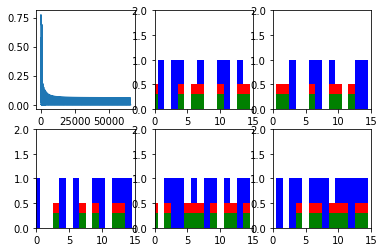

('Step', 400, 'Loss', 1.3149033e-05)


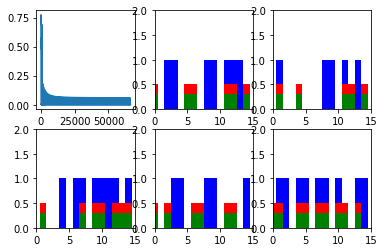

('Step', 500, 'Loss', 9.76076e-06)


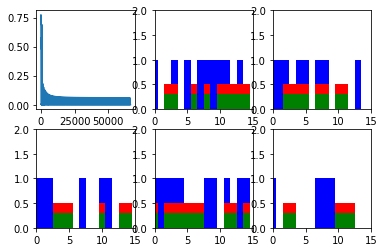

('Step', 600, 'Loss', 8.73875e-06)


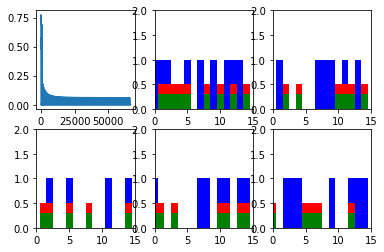

In [13]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []

    for epoch_idx in range(num_epochs):
        x,y = generateData()
        _current_state = np.zeros((batch_size, state_size))

        print("New data, epoch", epoch_idx)

        for batch_idx in range(num_batches):
            start_idx = batch_idx * truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length

            batchX = x[:,start_idx:end_idx]
            batchY = y[:,start_idx:end_idx]

            _total_loss, _train_step, _current_state, _predictions_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict={
                    batchX_placeholder:batchX,
                    batchY_placeholder:batchY,
                    init_state:_current_state
                })

            loss_list.append(_total_loss)

            if batch_idx%100 == 0:
                print("Step",batch_idx, "Loss", _total_loss)
                plot(loss_list, _predictions_series, batchX, batchY)

plt.ioff()
plt.show()